Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Dataset for Problem 1: bank_marketing_part1_Data.csv

Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)
    
advance_payments: Amount paid by the customer in advance by cash (in 100s)
    
probability_of_full_payment: Probability of payment done in full by the customer to the bank
    
current_balance: Balance amount left in the account to make purchases (in 1000s)
    
credit_limit: Limit of the amount in credit card (10000s)
    
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
    
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

(Rubric)
1.1 Read the data and do exploratory data analysis (3 pts). 

Describe the data briefly. Interpret the inferences for each (3 pts). 

Initial steps like head() .info(), Data Types, etc . Null value check. 

Distribution plots(histogram) or similar plots for the continuous columns.

Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there.

There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set(font_scale=1.2)

In [2]:
import dataframe_image as dfi

# 1.1 Read the data and do exploratory data analysis (3 pts).

In [3]:
clustering_df = pd.read_csv("bank_marketing_part1_Data.csv")#Reading the data
clustering_df

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                       0.8752            6.675   
1       15.99             14.89                       0.9064            5.363   
2       18.95             16.42                       0.8829            6.248   
3       10.83             12.96                       0.8099            5.278   
4       17.99             15.86                       0.8992            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                       0.8880            5.439   
206     16.77             15.62                       0.8638            5.927   
207     14.03             14.16                       0.8796            5.438   
208     16.12             15.00                       0.9000            5.709   
209     15.57             15.15                       0.8527            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
0           3.763            3.252                         6.550  
1           3.582            3.336                         5.144  
2           3.755            3.368                         6.148  
3           2.641            5.182                         5.185  
4           3.694            2.068                         5.837  
..            ...              ...                           ...  
205         3.199            3.986                         4.738  
206         3.438            4.920                         5.795  
207         3.201            1.717                         5.001  
208         3.485            2.270                         5.443  
209         3.231            2.640                         5.879  

[210 rows x 7 columns]

In [4]:
clustering_df.head()#sample of the data
dfi.export(clustering_df.head(), 'Bankmarket_Dataframe.png')

In [5]:
clustering_df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

In [6]:
clustering_df.tail()

spending  advance_payments  probability_of_full_payment  current_balance  \
205     13.89             14.02                       0.8880            5.439   
206     16.77             15.62                       0.8638            5.927   
207     14.03             14.16                       0.8796            5.438   
208     16.12             15.00                       0.9000            5.709   
209     15.57             15.15                       0.8527            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
205         3.199            3.986                         4.738  
206         3.438            4.920                         5.795  
207         3.201            1.717                         5.001  
208         3.485            2.270                         5.443  
209         3.231            2.640                         5.879

In [7]:
clustering_df.shape #dimensions of data

(210, 7)

In [8]:
clustering_df.size

1470

In [9]:
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


7 variables with 210 records.

The data has no missing values and all the variables are numeric type.

In [10]:
clustering_df.isnull().sum() # checking missing values

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [11]:
clustering_df.isnull().any().any() # The data contains no missing values.

False

In [12]:
for i in clustering_df.columns:
    print(clustering_df[i].unique(), '\n')

[19.94 15.99 18.95 10.83 17.99 12.7  12.02 13.74 18.17 11.23 18.55 14.09
 12.15 18.98 12.1  12.79 16.14 10.8  13.22 12.37 13.07 17.98 12.62 15.11
 15.56 12.78 11.02 11.35 13.78 11.84 12.55 15.88 11.82 11.19 11.14 12.22
 11.81 19.51 18.72 13.84 16.87 20.03 10.79 11.18 13.16 19.06 18.96 18.83
 12.73 19.46 19.38 18.81 16.23 12.38 11.83 10.93 18.65 14.79 11.41 11.27
 15.26 14.34 18.85 20.71 14.11 19.15 12.19 13.54 12.49 20.1  20.2  13.34
 18.94 15.03 12.13 16.82 14.29 14.52 12.88 13.94 18.59 10.91 14.49 16.63
 15.38 16.17 13.2  13.99 21.18 11.87 18.43 19.57 16.16 10.82 17.63 13.37
 19.31 18.89 15.69 18.36 13.32 12.8  18.75 15.6  14.33 20.24 12.89 11.21
 17.32 13.5  14.28 11.48 20.97 12.08 11.56 12.46 12.54 15.01 18.3  11.4
 14.46 11.36 14.86 12.36 12.05 19.14 17.55 14.59 15.78 14.92 11.24 11.34
 12.74 19.13 10.74 13.8  12.44 14.16 12.11 14.99 16.2  11.42 14.7  13.02
 11.26 17.36 20.88 12.72 18.88 17.26 18.27 11.65 15.5  15.05 12.76 11.43
 16.19 11.49 14.38 18.45 20.16 19.11 14.69 12.21 16.

No garbage values present in the columns.

In [13]:
clustering_df.describe()

spending  advance_payments  probability_of_full_payment  \
count  210.000000        210.000000                   210.000000   
mean    14.847524         14.559286                     0.870999   
std      2.909699          1.305959                     0.023629   
min     10.590000         12.410000                     0.808100   
25%     12.270000         13.450000                     0.856900   
50%     14.355000         14.320000                     0.873450   
75%     17.305000         15.715000                     0.887775   
max     21.180000         17.250000                     0.918300   

       current_balance  credit_limit  min_payment_amt  \
count       210.000000    210.000000       210.000000   
mean          5.628533      3.258605         3.700201   
std           0.443063      0.377714         1.503557   
min           4.899000      2.630000         0.765100   
25%           5.262250      2.944000         2.561500   
50%           5.523500      3.237000         3.599000   
75%           5.979750      3.561750         4.768750   
max           6.675000      4.033000         8.456000   

       max_spent_in_single_shopping  
count                    210.000000  
mean                       5.408071  
std                        0.491480  
min                        4.519000  
25%                        5.045000  
50%                        5.223000  
75%                        5.877000  
max                        6.550000

In [14]:
clustering_df.describe().T #summary of data

count       mean       std      min       25%  \
spending                      210.0  14.847524  2.909699  10.5900  12.27000   
advance_payments              210.0  14.559286  1.305959  12.4100  13.45000   
probability_of_full_payment   210.0   0.870999  0.023629   0.8081   0.85690   
current_balance               210.0   5.628533  0.443063   4.8990   5.26225   
credit_limit                  210.0   3.258605  0.377714   2.6300   2.94400   
min_payment_amt               210.0   3.700201  1.503557   0.7651   2.56150   
max_spent_in_single_shopping  210.0   5.408071  0.491480   4.5190   5.04500   

                                   50%        75%      max  
spending                      14.35500  17.305000  21.1800  
advance_payments              14.32000  15.715000  17.2500  
probability_of_full_payment    0.87345   0.887775   0.9183  
current_balance                5.52350   5.979750   6.6750  
credit_limit                   3.23700   3.561750   4.0330  
min_payment_amt                3.59900   4.768750   8.4560  
max_spent_in_single_shopping   5.22300   5.877000   6.5500

In [15]:
#checking Duplicates

dups = clustering_df.duplicated()
print('Number of duplicate rows in the dataset: %d' % (dups.sum()))

Number of duplicate rows in the dataset: 0


# Univariate Analysis

In [16]:
clustering_df.describe(percentiles = [0.25,0.50,0.75,0.90])

spending  advance_payments  probability_of_full_payment  \
count  210.000000        210.000000                   210.000000   
mean    14.847524         14.559286                     0.870999   
std      2.909699          1.305959                     0.023629   
min     10.590000         12.410000                     0.808100   
25%     12.270000         13.450000                     0.856900   
50%     14.355000         14.320000                     0.873450   
75%     17.305000         15.715000                     0.887775   
90%     18.988000         16.454000                     0.899300   
max     21.180000         17.250000                     0.918300   

       current_balance  credit_limit  min_payment_amt  \
count       210.000000    210.000000       210.000000   
mean          5.628533      3.258605         3.700201   
std           0.443063      0.377714         1.503557   
min           4.899000      2.630000         0.765100   
25%           5.262250      2.944000         2.561500   
50%           5.523500      3.237000         3.599000   
75%           5.979750      3.561750         4.768750   
90%           6.273300      3.786500         5.537600   
max           6.675000      4.033000         8.456000   

       max_spent_in_single_shopping  
count                    210.000000  
mean                       5.408071  
std                        0.491480  
min                        4.519000  
25%                        5.045000  
50%                        5.223000  
75%                        5.877000  
90%                        6.185000  
max                        6.550000

In [17]:
clustering_df.describe(percentiles = [0.25,0.50,0.75,0.90]).T # Descriptive Analysis of data.

count       mean       std      min       25%  \
spending                      210.0  14.847524  2.909699  10.5900  12.27000   
advance_payments              210.0  14.559286  1.305959  12.4100  13.45000   
probability_of_full_payment   210.0   0.870999  0.023629   0.8081   0.85690   
current_balance               210.0   5.628533  0.443063   4.8990   5.26225   
credit_limit                  210.0   3.258605  0.377714   2.6300   2.94400   
min_payment_amt               210.0   3.700201  1.503557   0.7651   2.56150   
max_spent_in_single_shopping  210.0   5.408071  0.491480   4.5190   5.04500   

                                   50%        75%      90%      max  
spending                      14.35500  17.305000  18.9880  21.1800  
advance_payments              14.32000  15.715000  16.4540  17.2500  
probability_of_full_payment    0.87345   0.887775   0.8993   0.9183  
current_balance                5.52350   5.979750   6.2733   6.6750  
credit_limit                   3.23700   3.561750   3.7865   4.0330  
min_payment_amt                3.59900   4.768750   5.5376   8.4560  
max_spent_in_single_shopping   5.22300   5.877000   6.1850   6.5500

From descriptive analysis, the data looks good and for most of the valiables means are nearly equal.Standard deviation is high for spending variable. 

## Spending Variable

In [18]:
#RANGE
print('Range: ', clustering_df['spending'].max()-clustering_df['spending'].min())

Range:  10.59


In [19]:
#Central values
print('Maximum spending: ',clustering_df['spending'].max())
print('Minimum spending: ',clustering_df['spending'].min())
print('Mean: ', clustering_df['spending'].mean())
print('Median: ',clustering_df['spending'].median())
print('Standard deviation: ', clustering_df['spending'].std())
print('Null values: ',clustering_df['spending'].isnull().any())

Maximum spending:  21.18
Minimum spending:  10.59
Mean:  14.847523809523818
Median:  14.355
Standard deviation:  2.909699430687361
Null values:  False


In [20]:
from scipy import stats

In [21]:
#Inter Quartile Range
Q1=clustering_df['spending'].quantile(q=0.25)
Q3=clustering_df['spending'].quantile(q=0.75)
print('spending - First Quartile(Q1) is: ', Q1)
print('spending - Third Quartile(Q3) is: ', Q3)
print('Interquartile range (IQR) for spending is ', stats.iqr(clustering_df['spending']))

spending - First Quartile(Q1) is:  12.27
spending - Third Quartile(Q3) is:  17.305
Interquartile range (IQR) for spending is  5.035


In [22]:
#Outliers
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', Lower_outliers)
print('Upper outliers in spending: ', Upper_outliers)

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [23]:
print('No.of outliers in spending upper : ', clustering_df[clustering_df['spending']>24.8575]['spending'].count())
print('No.of outliers in spending lower : ', clustering_df[clustering_df['spending']<4.717499]['spending'].count())
print('% of Outliers in spending upper: ',round(clustering_df[clustering_df['spending']>24.8575]['spending'].count()*100/len(clustering_df)), '%')
print('% of Outliers in spending lower: ',round(clustering_df[clustering_df['spending']<4.717499]['spending'].count()*100/len(clustering_df)), '%')

No.of outliers in spending upper :  0
No.of outliers in spending lower :  0
% of Outliers in spending upper:  0 %
% of Outliers in spending lower:  0 %


<AxesSubplot:title={'center':'spending'}, xlabel='spending'>

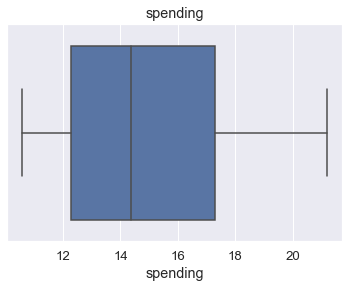

In [24]:
plt.title('spending')
sns.boxplot(clustering_df['spending'],orient='horizontal')

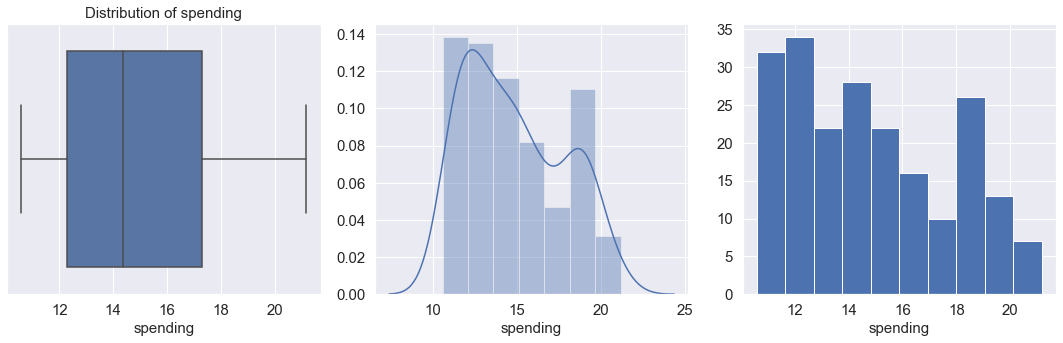

In [25]:
# Plotting boxplot,distplot and histogram for spending variable.

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='spending',data=clustering_df,orient='h',ax=ax1)
ax1.set_xlabel('spending', fontsize=15)
ax1.set_title('Distribution of spending', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(clustering_df['spending'],ax=ax2)
ax2.set_xlabel('spending', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(clustering_df['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## advance_payments Variable

In [26]:
#RANGE
print('Range: ', clustering_df['advance_payments'].max()-clustering_df['advance_payments'].min())

Range:  4.84


In [27]:
#Central values 
print('Maximum advance_payments: ',clustering_df['advance_payments'].max())
print('Minimum advance_payments: ', clustering_df['advance_payments'].min())
print('Mean: ', clustering_df['advance_payments'].mean())
print('Median: ',clustering_df['advance_payments'].median())
print('Standard deviation: ', clustering_df['advance_payments'].std())
print('Null values: ',clustering_df['advance_payments'].isnull().any())

Maximum advance_payments:  17.25
Minimum advance_payments:  12.41
Mean:  14.559285714285727
Median:  14.32
Standard deviation:  1.305958726564022
Null values:  False


In [28]:
#Inter Quartile Range
Q1=clustering_df['advance_payments'].quantile(q=0.25)
Q3=clustering_df['advance_payments'].quantile(q=0.75)
print('advance_payments - First Quartile(Q1) is: ', Q1)
print('advance_payments - Third Quartile(Q3) is: ', Q3)
print('Interquartile range (IQR) for advance_payments is ', stats.iqr(clustering_df['advance_payments']))

advance_payments - First Quartile(Q1) is:  13.45
advance_payments - Third Quartile(Q3) is:  15.715
Interquartile range (IQR) for advance_payments is  2.2650000000000006


In [29]:
#Outliers
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ', Lower_outliers)
print('Upper outliers in advance_payments: ', Upper_outliers)

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [30]:
print('No.of outliers in advance_payments upper : ',clustering_df[clustering_df['advance_payments']>19.1125]['advance_payments'].count())
print('No.of outliers in advance_payments lower : ', clustering_df[clustering_df['advance_payments']<10.052499]['advance_payments'].count())
print('% of Outliers in advance_payments upper: ',round(clustering_df[clustering_df['advance_payments']>19.1125]['advance_payments'].count()*100/len(clustering_df)), '%')
print('% of Outliers in advance_payments lower: ',round(clustering_df[clustering_df['advance_payments']<10.052499]['advance_payments'].count()*100/len(clustering_df)), '%')

No.of outliers in advance_payments upper :  0
No.of outliers in advance_payments lower :  0
% of Outliers in advance_payments upper:  0 %
% of Outliers in advance_payments lower:  0 %


<AxesSubplot:title={'center':'advance_payments'}, xlabel='advance_payments'>

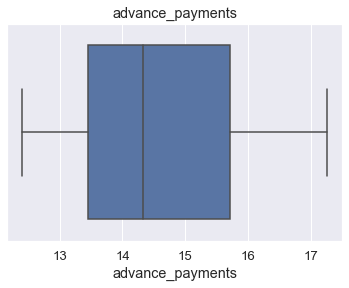

In [31]:
plt.title('advance_payments')
sns.boxplot(clustering_df['advance_payments'],orient='horizontal')

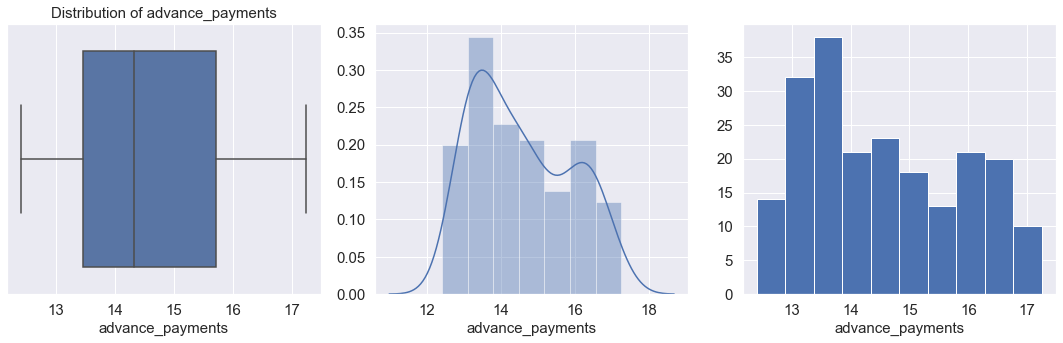

In [32]:
# Plotting boxplot,distplot and histogram for spending variable.

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))


sns.boxplot(x='advance_payments',data=clustering_df,orient='h',ax=ax1)
ax1.set_xlabel('advance_payments', fontsize=15)
ax1.set_title('Distribution of advance_payments', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(clustering_df['advance_payments'],ax=ax2)
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(clustering_df['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## probability_of_full_payment Variable

In [33]:
#RANGE
print('Range: ', clustering_df['probability_of_full_payment'].max()-clustering_df['probability_of_full_payment'].min())

Range:  0.11019999999999996


In [34]:
#Central values 
print('Maximum probability_of_full_payment: ',clustering_df['probability_of_full_payment'].max())
print('Minimum probability_of_full_payment ', clustering_df['probability_of_full_payment'].min())
print('Mean value: ', clustering_df['probability_of_full_payment'].mean())
print('Median value: ',clustering_df['probability_of_full_payment'].median())
print('Standard deviation: ',clustering_df['probability_of_full_payment'].std())
print('Null values: ',clustering_df['probability_of_full_payment'].isnull().any())

Maximum probability_of_full_payment:  0.9183
Minimum probability_of_full_payment  0.8081
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Standard deviation:  0.0236294165838465
Null values:  False


In [35]:
#Inter Quartile Range
Q1=clustering_df['probability_of_full_payment'].quantile(q=0.25)
Q3=clustering_df['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment - First Quartile (Q1) is: ', Q1)
print('probability_of_full_payment - Third Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) for probability_of_full_payment is ', stats.iqr(clustering_df['probability_of_full_payment']))

probability_of_full_payment - First Quartile (Q1) is:  0.8569
probability_of_full_payment - Third Quartile (Q3) is:  0.887775
Interquartile range (IQR) for probability_of_full_payment is  0.030874999999999986


In [36]:
#Outliers
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ', Lower_outliers)
print('Upper outliers in probability_of_full_payment: ', Upper_outliers)

Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [37]:
print('No.of outliers in probability_of_full_payment upper : ', clustering_df[clustering_df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count())
print('No.of outliers in probability_of_full_payment lower : ', clustering_df[clustering_df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count())
print('% of Outliers in probability_of_full_payment upper: ',round(clustering_df[clustering_df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count()*100/len(clustering_df)), '%')
print('% of Outliers in probability_of_full_payment lower: ',round(clustering_df[clustering_df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count()*100/len(clustering_df)), '%')

No.of outliers in probability_of_full_payment upper :  0
No.of outliers in probability_of_full_payment lower :  3
% of Outliers in probability_of_full_payment upper:  0 %
% of Outliers in probability_of_full_payment lower:  1 %


<AxesSubplot:title={'center':'probability_of_full_payment'}, xlabel='probability_of_full_payment'>

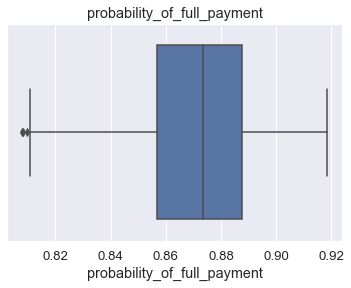

In [38]:
plt.title('probability_of_full_payment')
sns.boxplot(clustering_df['probability_of_full_payment'],orient='horizontal')

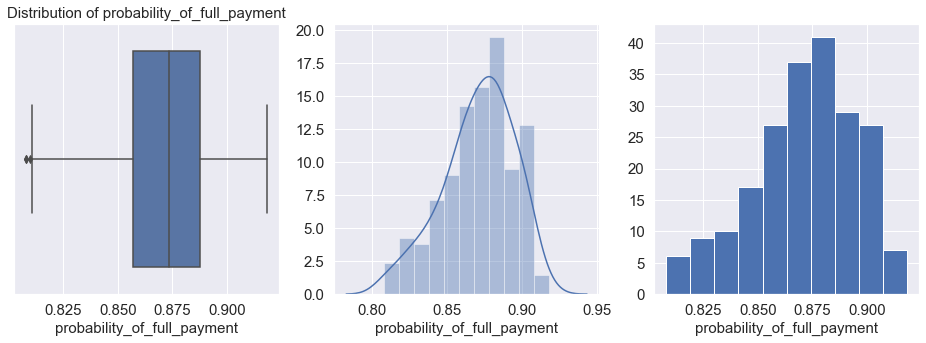

In [39]:
# Plotting boxplot,distplot and histogram for spending variable.

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='probability_of_full_payment',data=clustering_df,orient='h',ax=ax1)
ax1.set_xlabel('probability_of_full_payment', fontsize=15)
ax1.set_title('Distribution of probability_of_full_payment', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(clustering_df['probability_of_full_payment'],ax=ax2)
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(clustering_df['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


## current_balance Variable

In [40]:
#RANGE
print('Range: ', clustering_df['current_balance'].max()-clustering_df['current_balance'].min())

Range:  1.7759999999999998


In [41]:
#Central values 
print('Maximum current_balance: ',clustering_df['current_balance'].max())
print('Minimum current_balance: ', clustering_df['current_balance'].min())
print('Mean: ', clustering_df['current_balance'].mean())
print('Median: ',clustering_df['current_balance'].median())
print('Standard deviation: ',clustering_df['current_balance'].std())
print('Null values: ',clustering_df['current_balance'].isnull().any())

Maximum current_balance:  6.675
Minimum current_balance:  4.899
Mean:  5.628533333333335
Median:  5.5235
Standard deviation:  0.44306347772644944
Null values:  False


In [42]:
#Inter Quartile Range

Q1=clustering_df['current_balance'].quantile(q=0.25)
Q3=clustering_df['current_balance'].quantile(q=0.75)
print('current_balance - First Quartile (Q1) is: ', Q1)
print('current_balance - Third Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) for current_balance is ', stats.iqr(clustering_df['current_balance']))


current_balance - First Quartile (Q1) is:  5.26225
current_balance - Third Quartile (Q3) is:  5.97975
Interquartile range (IQR) for current_balance is  0.7175000000000002


In [43]:
#Outliers
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ', Lower_outliers)
print('Upper outliers in current_balance: ', Upper_outliers)

Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [44]:
print('No.of outliers in current_balance upper : ', clustering_df[clustering_df['current_balance']>7.056000000000001]['current_balance'].count())
print('No.of outliers in current_balance lower : ', clustering_df[clustering_df['current_balance']<4.186]['current_balance'].count())
print('% of Outliers in current_balance upper: ',round(clustering_df[clustering_df['current_balance']>7.056000000000001]['current_balance'].count()*100/len(clustering_df)), '%')
print('% of Outliers in current_balance lower: ',round(clustering_df[clustering_df['current_balance']<4.186]['current_balance'].count()*100/len(clustering_df)), '%')

No.of outliers in current_balance upper :  0
No.of outliers in current_balance lower :  0
% of Outliers in current_balance upper:  0 %
% of Outliers in current_balance lower:  0 %


<AxesSubplot:title={'center':'current_balance'}, xlabel='current_balance'>

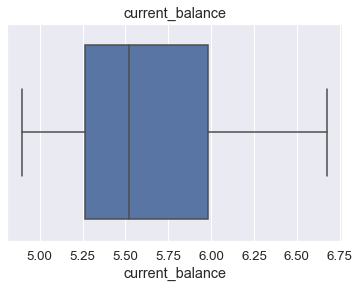

In [45]:
plt.title('current_balance')
sns.boxplot(clustering_df['current_balance'],orient='horizontal')

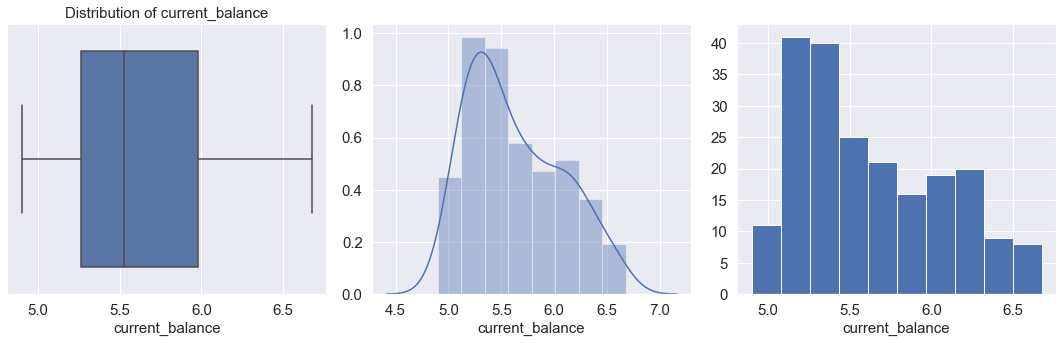

In [46]:
# Plotting boxplot,distplot and histogram for spending variable.

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='current_balance',data=clustering_df,orient='h',ax=ax1)
ax1.set_xlabel('current_balance', fontsize=15)
ax1.set_title('Distribution of current_balance', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(clustering_df['current_balance'],ax=ax2)
ax2.set_xlabel('current_balance', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(clustering_df['current_balance'])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## credit_limit Variable

In [47]:
#RANGE
print('Range: ', clustering_df['credit_limit'].max()-clustering_df['credit_limit'].min())

Range:  1.4030000000000005


In [48]:
#Central values 
print('Maximum credit_limit: ',clustering_df['credit_limit'].max())
print('Minimum credit_limit: ', clustering_df['credit_limit'].min())
print('Mean: ', clustering_df['credit_limit'].mean())
print('Median: ',clustering_df['credit_limit'].median())
print('Standard deviation: ', clustering_df['credit_limit'].std())
print('Null values: ',clustering_df['credit_limit'].isnull().any())

Maximum credit_limit:  4.033
Minimum credit_limit:  2.63
Mean:  3.258604761904763
Median:  3.237
Standard deviation:  0.37771444490658734
Null values:  False


In [49]:
#Inter Quartile Range
Q1=clustering_df['credit_limit'].quantile(q=0.25)
Q3=clustering_df['credit_limit'].quantile(q=0.75)
print('credit_limit - First Quartile (Q1) is: ', Q1)
print('credit_limit - Third Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of credit_limit is ', stats.iqr(clustering_df['credit_limit']))

credit_limit - First Quartile (Q1) is:  2.944
credit_limit - Third Quartile (Q3) is:  3.56175
Interquartile range (IQR) of credit_limit is  0.61775


In [50]:
#Outliers
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ', Lower_outliers)
print('Upper outliers in credit_limit: ', Upper_outliers)

Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [51]:
print('No.of outliers in credit_limit upper : ', clustering_df[clustering_df['credit_limit']>4.488375]['credit_limit'].count())
print('No.of outliers in credit_limit lower : ', clustering_df[clustering_df['credit_limit']<2.017375]['credit_limit'].count())
print('% of Outliers in credit_limit upper: ',round(clustering_df[clustering_df['credit_limit']>4.488375]['credit_limit'].count()*100/len(clustering_df)), '%')
print('% of Outliers in credit_limit lower: ',round(clustering_df[clustering_df['credit_limit']<2.017375]['credit_limit'].count()*100/len(clustering_df)), '%')

No.of outliers in credit_limit upper :  0
No.of outliers in credit_limit lower :  0
% of Outliers in credit_limit upper:  0 %
% of Outliers in credit_limit lower:  0 %


<AxesSubplot:title={'center':'credit_limit'}, xlabel='credit_limit'>

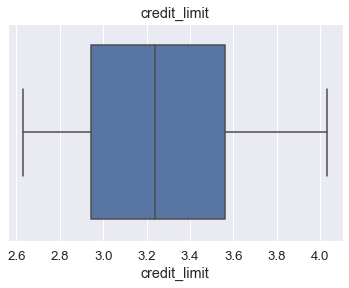

In [52]:
plt.title('credit_limit')
sns.boxplot(clustering_df['credit_limit'],orient='horizontal')

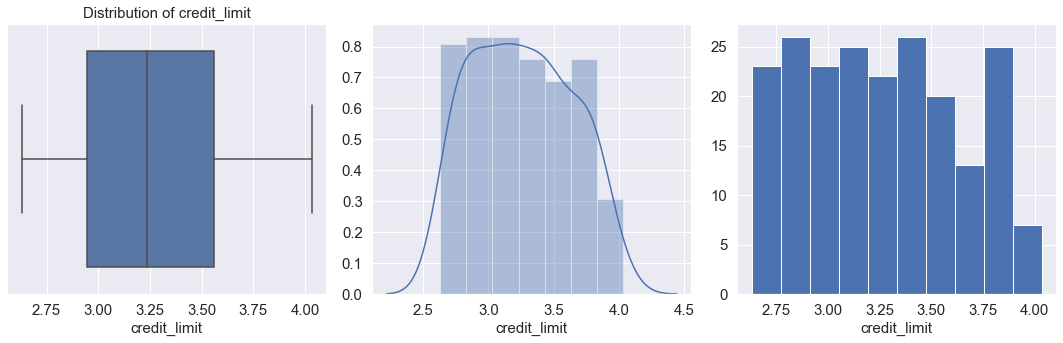

In [53]:
# Plotting boxplot,distplot and histogram for spending variable.

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='credit_limit',data=clustering_df,orient='h',ax=ax1)
ax1.set_xlabel('credit_limit', fontsize=15)
ax1.set_title('Distribution of credit_limit', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(clustering_df['credit_limit'],ax=ax2)
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(clustering_df['credit_limit'])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


## min_payment_amt Variable

In [54]:
#RANGE
print('Range of values: ',clustering_df['min_payment_amt'].max()-clustering_df['min_payment_amt'].min())

Range of values:  7.690899999999999


In [55]:
#Central values 
print('Maximum min_payment_amt: ',clustering_df['min_payment_amt'].max())
print('Minimum min_payment_amt: ', clustering_df['min_payment_amt'].min())
print('Mean: ', clustering_df['min_payment_amt'].mean())
print('Median: ',clustering_df['min_payment_amt'].median())
print('Standard deviation: ', clustering_df['min_payment_amt'].std())
print('Null values: ',clustering_df['min_payment_amt'].isnull().any())

Maximum min_payment_amt:  8.456
Minimum min_payment_amt:  0.7651
Mean:  3.7002009523809503
Median:  3.599
Standard deviation:  1.5035571308217792
Null values:  False


In [56]:
#Inter Quartile Range
Q1=clustering_df['min_payment_amt'].quantile(q=0.25)
Q3=clustering_df['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt - First Quartile (Q1) is: ', Q1)
print('min_payment_amt - Third Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) for min_payment_amt is ', stats.iqr(clustering_df['min_payment_amt']))

min_payment_amt - First Quartile (Q1) is:  2.5615
min_payment_amt - Third Quartile (Q3) is:  4.76875
Interquartile range (IQR) for min_payment_amt is  2.2072499999999997


In [57]:
#Outliers
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ', Lower_outliers)
print('Upper outliers in min_payment_amt: ', Upper_outliers)

Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625


In [58]:
print('No.of outliers in min_payment_amt upper : ', clustering_df[clustering_df['min_payment_amt']>8.079625]['min_payment_amt'].count())
print('No.of outliers in min_payment_amt lower : ', clustering_df[clustering_df['min_payment_amt']<-0.749375]['min_payment_amt'].count())
print('% of Outliers in min_payment_amt upper: ',round(clustering_df[clustering_df['min_payment_amt']>8.079625]['min_payment_amt'].count()*100/len(clustering_df)), '%')
print('% of Outliers in min_payment_amt lower: ',round(clustering_df[clustering_df['min_payment_amt']<-0.749375]['min_payment_amt'].count()*100/len(clustering_df)), '%')

No.of outliers in min_payment_amt upper :  2
No.of outliers in min_payment_amt lower :  0
% of Outliers in min_payment_amt upper:  1 %
% of Outliers in min_payment_amt lower:  0 %


<AxesSubplot:title={'center':'min_payment_amt'}, xlabel='min_payment_amt'>

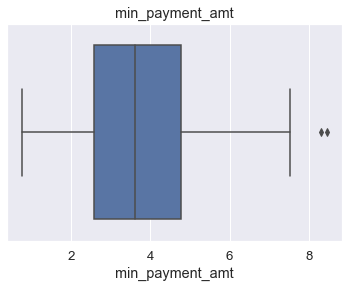

In [59]:
plt.title('min_payment_amt')
sns.boxplot(clustering_df['min_payment_amt'],orient='horizontal')

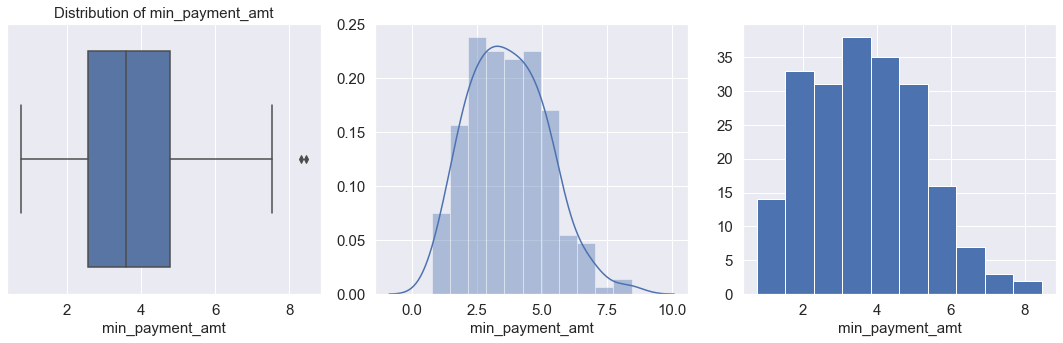

In [60]:
# Plotting boxplot,distplot and histogram for spending variable.

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='min_payment_amt',data=clustering_df,orient='h',ax=ax1)
ax1.set_xlabel('min_payment_amt', fontsize=15)
ax1.set_title('Distribution of min_payment_amt', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(clustering_df['min_payment_amt'],ax=ax2)
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(clustering_df['min_payment_amt'])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


## max_spent_in_single_shopping Variable

In [61]:
#RANGE
print('Range: ', clustering_df['max_spent_in_single_shopping'].max()-clustering_df['max_spent_in_single_shopping'].min())

Range:  2.0309999999999997


In [62]:
#Central values 
print('Maximum max_spent_in_single_shoppings: ',clustering_df['max_spent_in_single_shopping'].max())
print('Minimum max_spent_in_single_shopping: ', clustering_df['max_spent_in_single_shopping'].min())
print('Mean: ', clustering_df['max_spent_in_single_shopping'].mean())
print('Median: ',clustering_df['max_spent_in_single_shopping'].median())
print('Standard deviation: ', clustering_df['max_spent_in_single_shopping'].std())
print('Null values: ',clustering_df['max_spent_in_single_shopping'].isnull().any())

Maximum max_spent_in_single_shoppings:  6.55
Minimum max_spent_in_single_shopping:  4.519
Mean:  5.408071428571429
Median:  5.223000000000001
Standard deviation:  0.49148049910240543
Null values:  False


In [63]:
# Inter Quartile Range
Q1=clustering_df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=clustering_df['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - First Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping - Third Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is ', stats.iqr(clustering_df['max_spent_in_single_shopping']))

max_spent_in_single_shopping - First Quartile (Q1) is:  5.045
max_spent_in_single_shopping - Third Quartile (Q3) is:  5.877
Interquartile range (IQR) of max_spent_in_single_shopping is  0.8319999999999999


In [64]:
#Outliers
Lower_outliers=Q1-1.5*(Q3-Q1)
Upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping: ', Lower_outliers)
print('Upper outliers in max_spent_in_single_shopping: ', Upper_outliers)

Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125


In [65]:
print('No.of outliers in max_spent_in_single_shopping upper : ', clustering_df[clustering_df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count())
print('No.of outliers in max_spent_in_single_shopping lower : ', clustering_df[clustering_df['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count())
print('% of Outliers in max_spent_in_single_shopping upper: ',round(clustering_df[clustering_df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count()*100/len(clustering_df)), '%')
print('% of Outliers in max_spent_in_single_shopping lower: ',round(clustering_df[clustering_df['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count()*100/len(clustering_df)), '%')

No.of outliers in max_spent_in_single_shopping upper :  0
No.of outliers in max_spent_in_single_shopping lower :  0
% of Outliers in max_spent_in_single_shopping upper:  0 %
% of Outliers in max_spent_in_single_shopping lower:  0 %


<AxesSubplot:title={'center':'max_spent_in_single_shopping'}, xlabel='max_spent_in_single_shopping'>

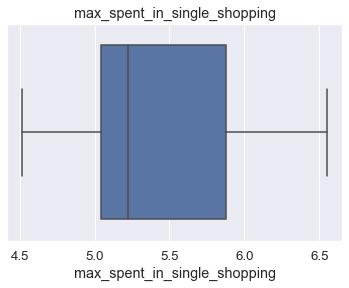

In [66]:
plt.title('max_spent_in_single_shopping')
sns.boxplot(clustering_df['max_spent_in_single_shopping'],orient='horizontal')

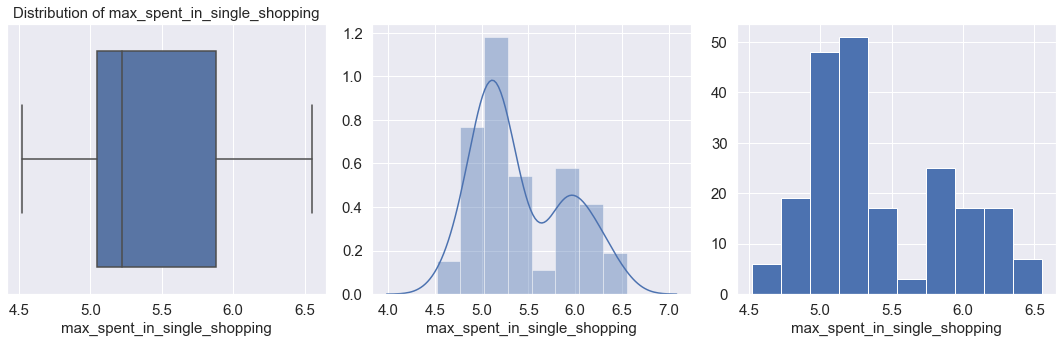

In [67]:
# Plotting boxplot,distplot and histogram for spending variable.

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x='max_spent_in_single_shopping',data=clustering_df,orient='h',ax=ax1)
ax1.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax1.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(clustering_df['max_spent_in_single_shopping'],ax=ax2)
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(clustering_df['max_spent_in_single_shopping'])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

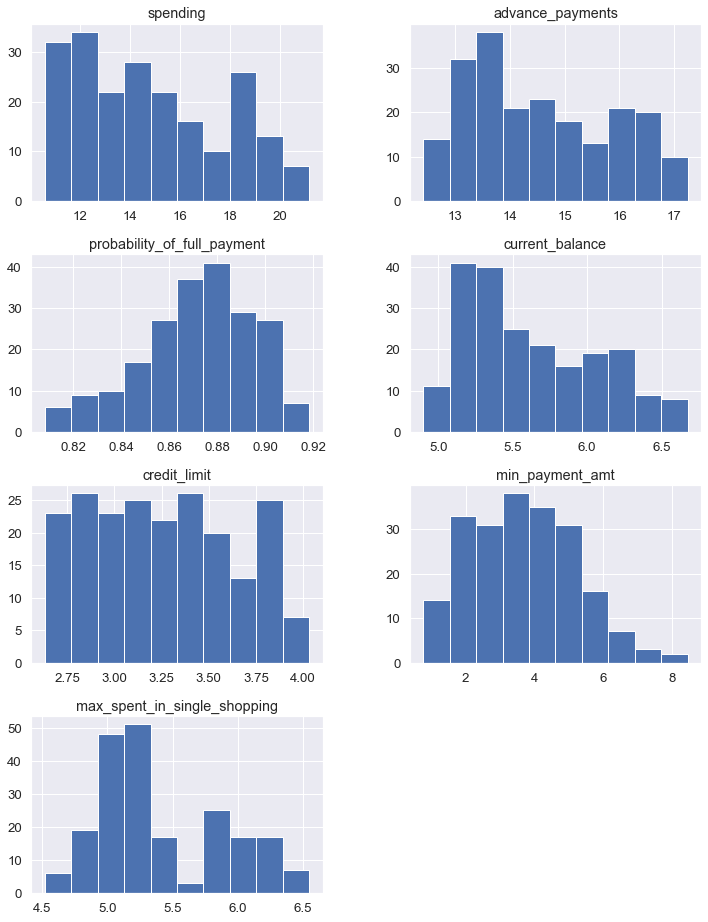

In [68]:
#Plotting the distributions of independent variables

clustering_df.hist(figsize=(12,16),layout=(4,2));

In [69]:
#Skewness
clustering_df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

In [70]:
import warnings
warnings.filterwarnings('ignore')

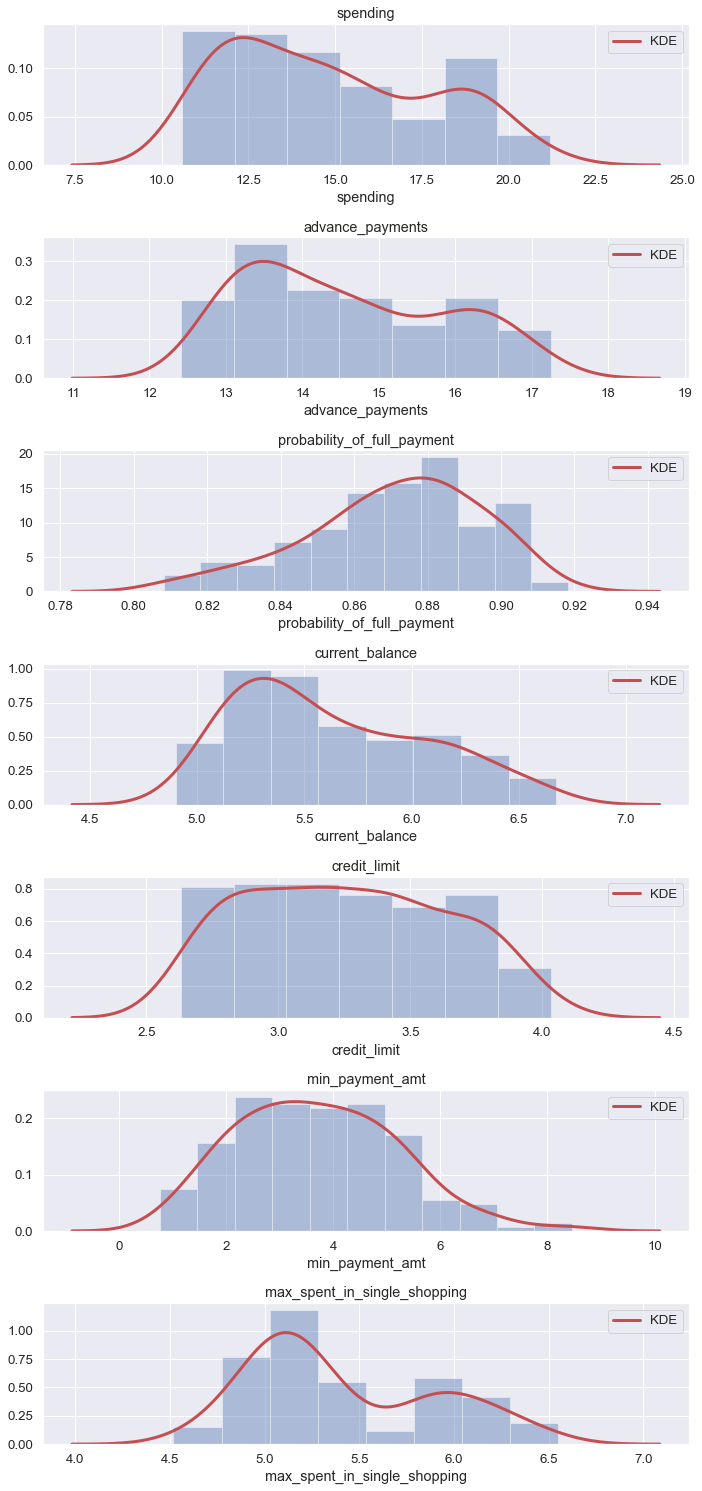

In [71]:
plt.figure(figsize=(10,50)) #KDE is used for visualizing the Probability Density of a continuous variable. 
for i in range(len(clustering_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(clustering_df[clustering_df.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "b"})
    plt.title(clustering_df.columns[i])

plt.tight_layout()

Inference:

1.Credit limit is around $3.258

2.The distribution is right skewed for all the variables except probability_of_full_payment(left skewed).

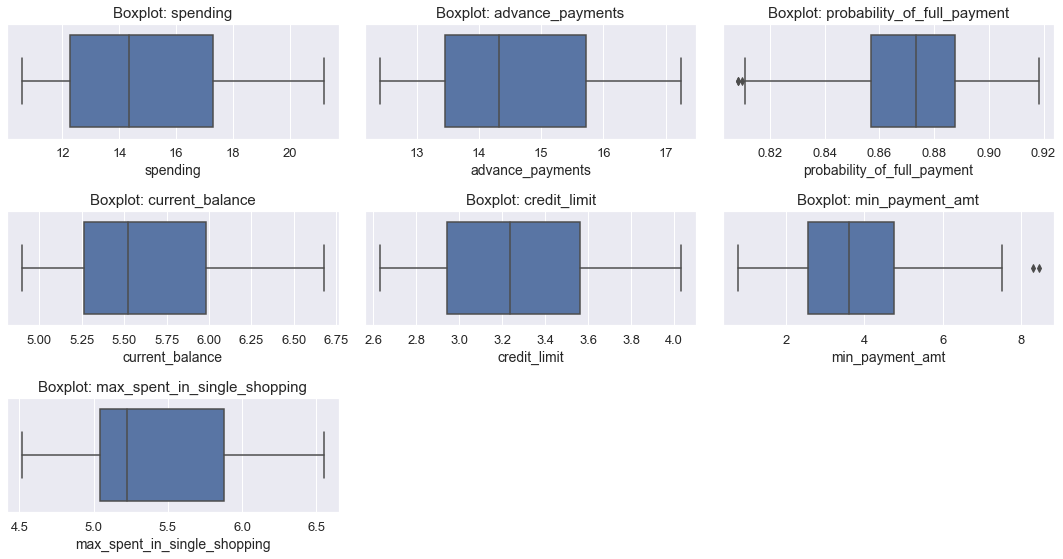

In [72]:
plt.figure(figsize=(15,8))
for i in np.arange(len(clustering_df.columns)):
    plt.subplot(3,3, i+1)
    sns.boxplot(data=clustering_df, x= clustering_df.columns[i])
    plt.xticks(fontsize=13)
    plt.xlabel(clustering_df.columns[i], fontsize=14)
    plt.title('Boxplot: {}'.format(clustering_df.columns[i]), fontsize= 15)
    plt.tight_layout()
    plt.savefig('boxplot_before treating outliers.png')

In [73]:
def outliers_treatment(i):
    q1,q3 = clustering_df[i].quantile([.25,.75])
    iqr= q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    return clustering_df[i].apply(lambda y: ll if y<ll else y).apply(lambda y: ul if y>ul else y)

In [74]:
for i in clustering_df.columns:
    clustering_df[i] = outliers_treatment(i)

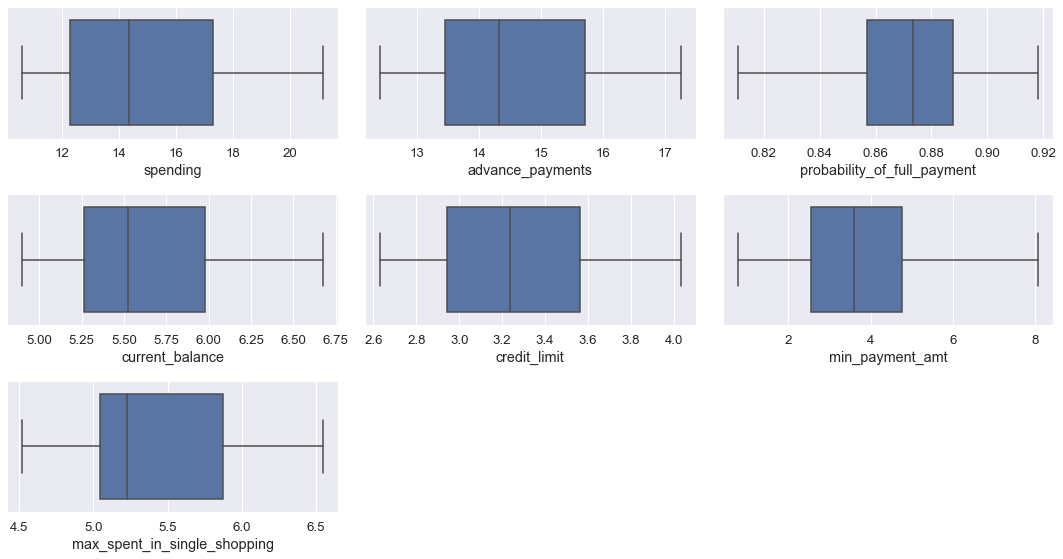

In [75]:
plt.figure(figsize=(15,8))
for i in np.arange(len(clustering_df.columns)):
    plt.subplot(3,3, i+1)
    sns.boxplot(data=clustering_df, x= clustering_df.columns[i])
    plt.tight_layout()
    plt.savefig('boxplot_after treating outliers.png')

# Multivariate Analysis

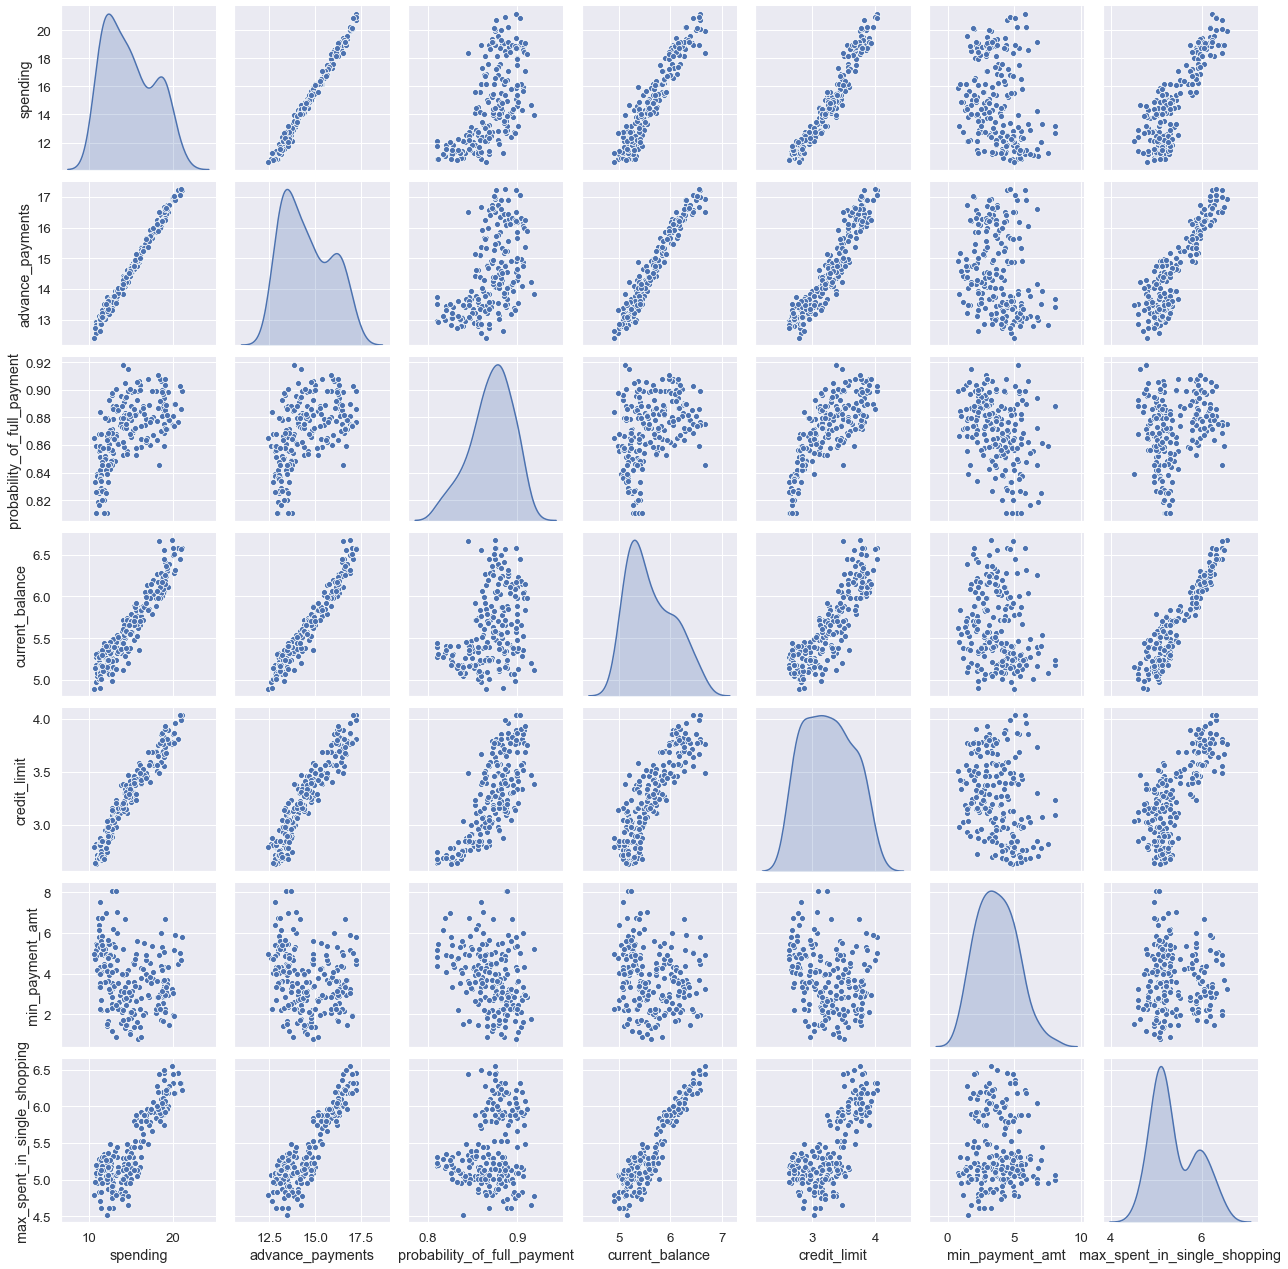

In [76]:
# Checking for multicollinearity

sns.pairplot(clustering_df,diag_kind='kde')

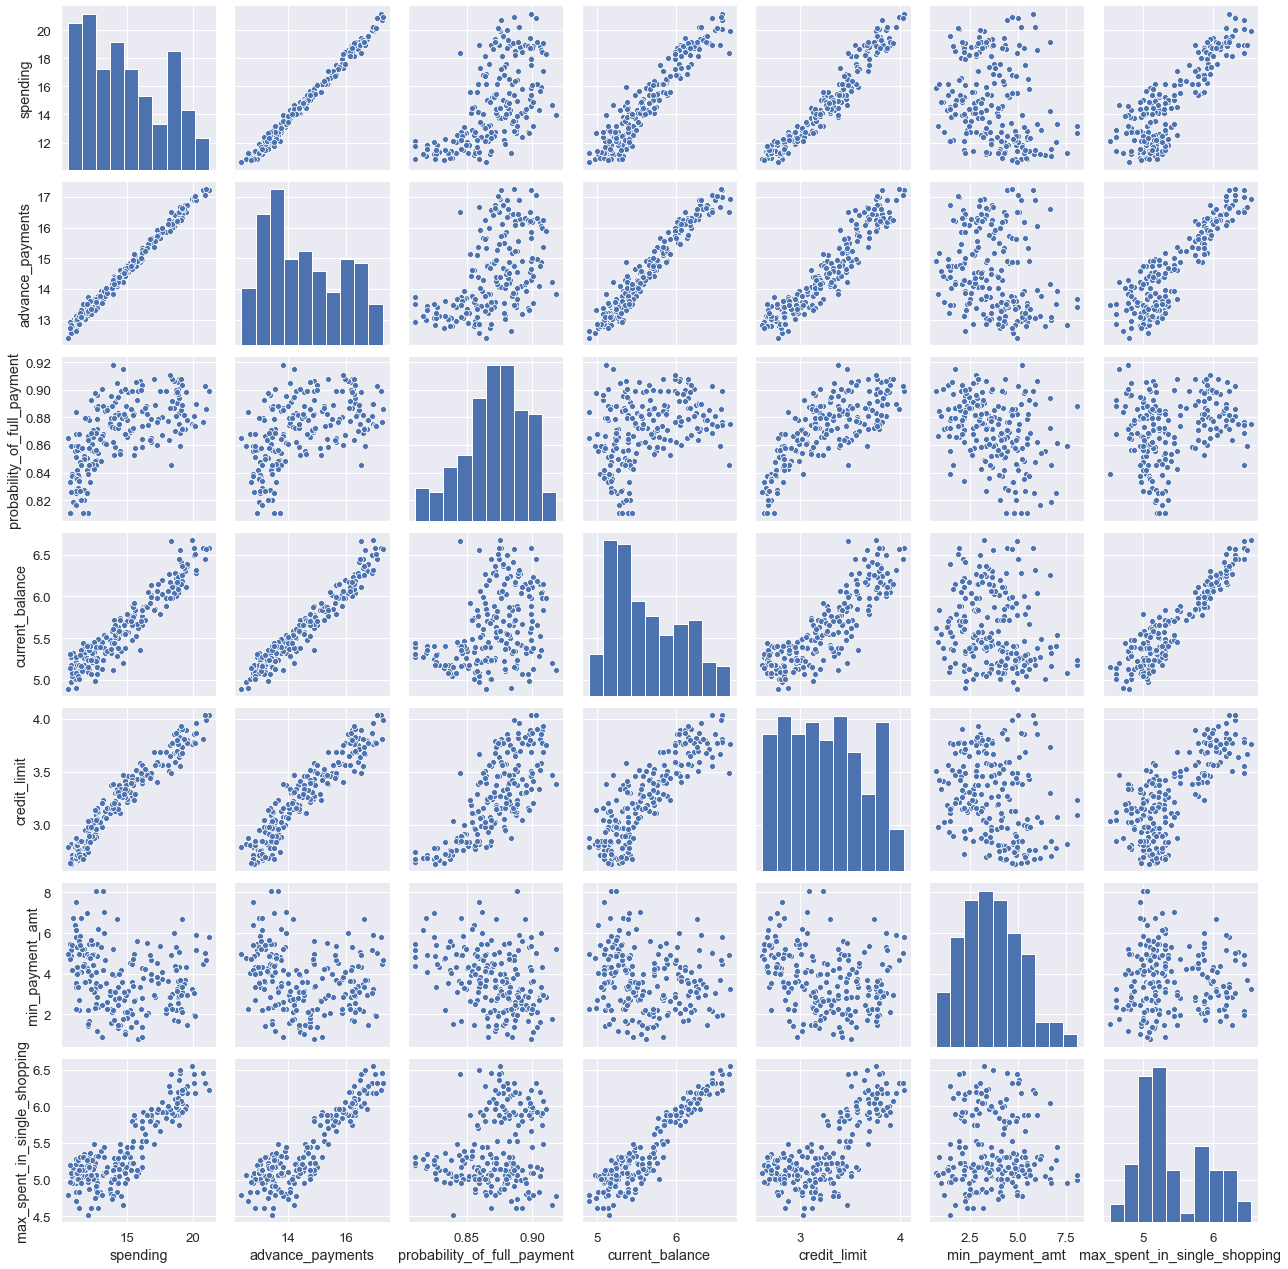

In [77]:
sns.pairplot(clustering_df)
plt.savefig('Pairplot fot multivariate Analysis')

Inference:
    
Strong positive correlation between

        --> spending & advance_payments, 
        
        --> advance_payments & current_balance, 
        
        --> credit_limit & spending
        
        --> spending & current_balance
        
        --> credit_limit & advance_payments
        
        --> max_spent_in_single_shopping  current_balance

In [78]:
#Correlation Matrix

clustering_df.corr()

spending  advance_payments  \
spending                      1.000000          0.994341   
advance_payments              0.994341          1.000000   
probability_of_full_payment   0.608900          0.529925   
current_balance               0.949985          0.972422   
credit_limit                  0.970771          0.944829   
min_payment_amt              -0.229619         -0.217051   
max_spent_in_single_shopping  0.863693          0.890784   

                              probability_of_full_payment  current_balance  \
spending                                         0.608900         0.949985   
advance_payments                                 0.529925         0.972422   
probability_of_full_payment                      1.000000         0.368419   
current_balance                                  0.368419         1.000000   
credit_limit                                     0.762218         0.860415   
min_payment_amt                                 -0.335071        -0.170701   
max_spent_in_single_shopping                     0.227140         0.932806   

                              credit_limit  min_payment_amt  \
spending                          0.970771        -0.229619   
advance_payments                  0.944829        -0.217051   
probability_of_full_payment       0.762218        -0.335071   
current_balance                   0.860415        -0.170701   
credit_limit                      1.000000        -0.258980   
min_payment_amt                  -0.258980         1.000000   
max_spent_in_single_shopping      0.749131        -0.009605   

                              max_spent_in_single_shopping  
spending                                          0.863693  
advance_payments                                  0.890784  
probability_of_full_payment                       0.227140  
current_balance                                   0.932806  
credit_limit                                      0.749131  
min_payment_amt                                  -0.009605  
max_spent_in_single_shopping                      1.000000

In [79]:
clustering_df.corr().T
#dfi.export(clustering_df.corr().T, 'Correlation Matrix.png')

spending  advance_payments  \
spending                      1.000000          0.994341   
advance_payments              0.994341          1.000000   
probability_of_full_payment   0.608900          0.529925   
current_balance               0.949985          0.972422   
credit_limit                  0.970771          0.944829   
min_payment_amt              -0.229619         -0.217051   
max_spent_in_single_shopping  0.863693          0.890784   

                              probability_of_full_payment  current_balance  \
spending                                         0.608900         0.949985   
advance_payments                                 0.529925         0.972422   
probability_of_full_payment                      1.000000         0.368419   
current_balance                                  0.368419         1.000000   
credit_limit                                     0.762218         0.860415   
min_payment_amt                                 -0.335071        -0.170701   
max_spent_in_single_shopping                     0.227140         0.932806   

                              credit_limit  min_payment_amt  \
spending                          0.970771        -0.229619   
advance_payments                  0.944829        -0.217051   
probability_of_full_payment       0.762218        -0.335071   
current_balance                   0.860415        -0.170701   
credit_limit                      1.000000        -0.258980   
min_payment_amt                  -0.258980         1.000000   
max_spent_in_single_shopping      0.749131        -0.009605   

                              max_spent_in_single_shopping  
spending                                          0.863693  
advance_payments                                  0.890784  
probability_of_full_payment                       0.227140  
current_balance                                   0.932806  
credit_limit                                      0.749131  
min_payment_amt                                  -0.009605  
max_spent_in_single_shopping                      1.000000

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'spending'),
  Text(1.5, 0, 'advance_payments'),
  Text(2.5, 0, 'probability_of_full_payment'),
  Text(3.5, 0, 'current_balance'),
  Text(4.5, 0, 'credit_limit'),
  Text(5.5, 0, 'min_payment_amt'),
  Text(6.5, 0, 'max_spent_in_single_shopping')])

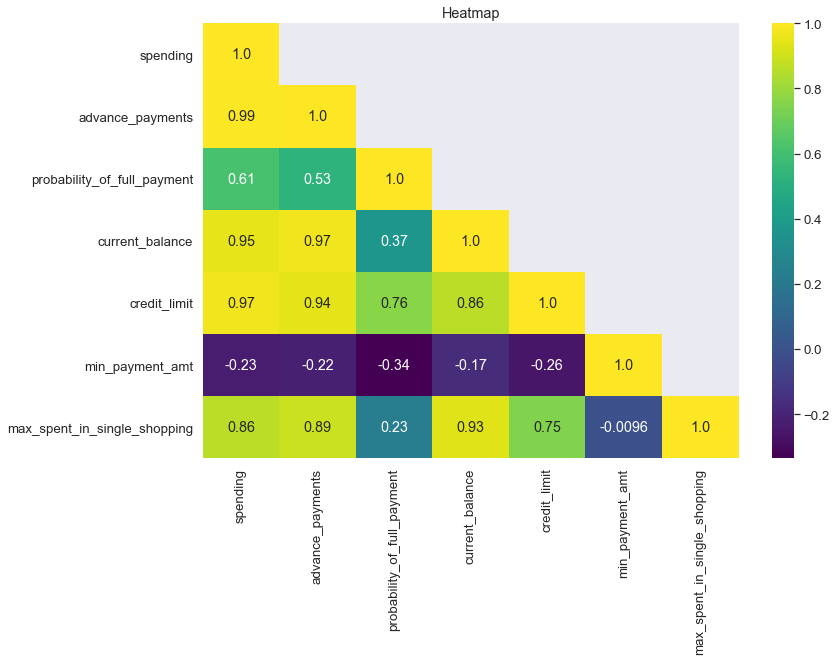

In [80]:
#Heatmap 

corr = clustering_df.corr()
plt.figure(figsize=(12,8))
msk = np.triu(corr, +1)
sns.heatmap(corr, mask= msk, annot=True, fmt='.2', cmap='viridis')
plt.title('Heatmap')
plt.savefig('Heatmap.png')
plt.xticks(rotation=90)


## 1.2  Do you think scaling is necessary for clustering in this case? Justify

### (Rubric)1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

In [81]:
clustering_df.describe().T 

count       mean       std        min       25%  \
spending                      210.0  14.847524  2.909699  10.590000  12.27000   
advance_payments              210.0  14.559286  1.305959  12.410000  13.45000   
probability_of_full_payment   210.0   0.871025  0.023560   0.810588   0.85690   
current_balance               210.0   5.628533  0.443063   4.899000   5.26225   
credit_limit                  210.0   3.258605  0.377714   2.630000   2.94400   
min_payment_amt               210.0   3.697288  1.494689   0.765100   2.56150   
max_spent_in_single_shopping  210.0   5.408071  0.491480   4.519000   5.04500   

                                   50%        75%        max  
spending                      14.35500  17.305000  21.180000  
advance_payments              14.32000  15.715000  17.250000  
probability_of_full_payment    0.87345   0.887775   0.918300  
current_balance                5.52350   5.979750   6.675000  
credit_limit                   3.23700   3.561750   4.033000  
min_payment_amt                3.59900   4.768750   8.079625  
max_spent_in_single_shopping   5.22300   5.877000   6.550000

Scaling is necessary for clustering in this case as the values of variables are in different ranges.

The spending and advance_payments have different scales and this may get more weightage.

Hence we need to scale the data to bring all of them to same scale.

Here, I have used sklearn Standard scaler method to scale the data.

In [82]:
from sklearn.preprocessing import StandardScaler
scaled_df = pd.DataFrame(StandardScaler().fit_transform(clustering_df), columns=clustering_df.columns, index=clustering_df.index)

In [83]:
scaled_df

spending  advance_payments  probability_of_full_payment  current_balance  \
0    1.754355          1.811968                     0.177628         2.367533   
1    0.393582          0.253840                     1.505071        -0.600744   
2    1.413300          1.428192                     0.505234         1.401485   
3   -1.384034         -1.227533                    -2.571391        -0.793049   
4    1.082581          0.998364                     1.198738         0.591544   
..        ...               ...                          ...              ...   
205 -0.329866         -0.413929                     0.722220        -0.428801   
206  0.662292          0.814152                    -0.307399         0.675253   
207 -0.281636         -0.306472                     0.364831        -0.431064   
208  0.438367          0.338271                     1.232775         0.182048   
209  0.248893          0.453403                    -0.779662         0.659416   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
0        1.338579        -0.298625                      2.328998  
1        0.858236        -0.242292                     -0.538582  
2        1.317348        -0.220832                      1.509107  
3       -1.639017         0.995699                     -0.454961  
4        1.155464        -1.092656                      0.874813  
..            ...              ...                           ...  
205     -0.158181         0.193620                     -1.366631  
206      0.476084         0.819993                      0.789153  
207     -0.152873        -1.328049                     -0.830235  
208      0.600814        -0.957188                      0.071238  
209     -0.073258        -0.709053                      0.960473  

[210 rows x 7 columns]

In [84]:
scaled_df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.177628         2.367533   
1  0.393582          0.253840                     1.505071        -0.600744   
2  1.413300          1.428192                     0.505234         1.401485   
3 -1.384034         -1.227533                    -2.571391        -0.793049   
4  1.082581          0.998364                     1.198738         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0      1.338579        -0.298625                      2.328998  
1      0.858236        -0.242292                     -0.538582  
2      1.317348        -0.220832                      1.509107  
3     -1.639017         0.995699                     -0.454961  
4      1.155464        -1.092656                      0.874813

In [85]:
scaled_df.describe()

spending  advance_payments  probability_of_full_payment  \
count  2.100000e+02      2.100000e+02                 2.100000e+02   
mean   9.148766e-16      1.097006e-16                 1.642601e-15   
std    1.002389e+00      1.002389e+00                 1.002389e+00   
min   -1.466714e+00     -1.649686e+00                -2.571391e+00   
25%   -8.879552e-01     -8.514330e-01                -6.009681e-01   
50%   -1.696741e-01     -1.836639e-01                 1.031721e-01   
75%    8.465989e-01      8.870693e-01                 7.126469e-01   
max    2.181534e+00      2.065260e+00                 2.011371e+00   

       current_balance  credit_limit  min_payment_amt  \
count     2.100000e+02  2.100000e+02     2.100000e+02   
mean     -1.089076e-16 -2.994298e-16     1.512018e-16   
std       1.002389e+00  1.002389e+00     1.002389e+00   
min      -1.650501e+00 -1.668209e+00    -1.966425e+00   
25%      -8.286816e-01 -8.349072e-01    -7.616981e-01   
50%      -2.376280e-01 -5.733534e-02    -6.591519e-02   
75%       7.945947e-01  8.044956e-01     7.185591e-01   
max       2.367533e+00  2.055112e+00     2.938945e+00   

       max_spent_in_single_shopping  
count                  2.100000e+02  
mean                  -1.935489e-15  
std                    1.002389e+00  
min                   -1.813288e+00  
25%                   -7.404953e-01  
50%                   -3.774588e-01  
75%                    9.563941e-01  
max                    2.328998e+00

In [86]:
scaled_df.describe().T

count          mean       std       min  \
spending                      210.0  9.148766e-16  1.002389 -1.466714   
advance_payments              210.0  1.097006e-16  1.002389 -1.649686   
probability_of_full_payment   210.0  1.642601e-15  1.002389 -2.571391   
current_balance               210.0 -1.089076e-16  1.002389 -1.650501   
credit_limit                  210.0 -2.994298e-16  1.002389 -1.668209   
min_payment_amt               210.0  1.512018e-16  1.002389 -1.966425   
max_spent_in_single_shopping  210.0 -1.935489e-15  1.002389 -1.813288   

                                   25%       50%       75%       max  
spending                     -0.887955 -0.169674  0.846599  2.181534  
advance_payments             -0.851433 -0.183664  0.887069  2.065260  
probability_of_full_payment  -0.600968  0.103172  0.712647  2.011371  
current_balance              -0.828682 -0.237628  0.794595  2.367533  
credit_limit                 -0.834907 -0.057335  0.804496  2.055112  
min_payment_amt              -0.761698 -0.065915  0.718559  2.938945  
max_spent_in_single_shopping -0.740495 -0.377459  0.956394  2.328998

In [87]:
#dfi.export(scaled_df.describe().T, 'DF_Scaled.png')

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

In [88]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

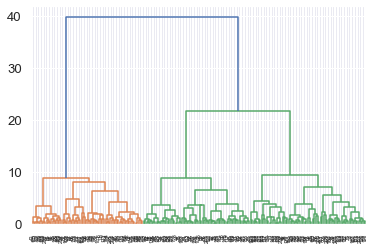

In [89]:
lnk = linkage(scaled_df, method='ward')
dend = dendrogram(lnk)

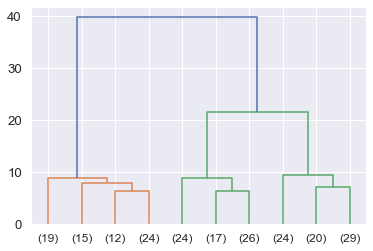

In [90]:
dend = dendrogram(lnk,
                truncate_mode = 'lastp',
                p=10,)

In [91]:
clusters = fcluster(lnk, 3 ,criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [92]:
clusters = fcluster(lnk, 3 ,criterion='maxclust')
clusters
H_cluster = clustering_df.copy()
H_cluster['H_clusters'] = clusters
H_cluster['Sil_width'] = silhouette_samples(scaled_df, clusters)
H_cluster.to_csv('Hierarchial_clustering.csv')
H_cluster

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                     0.875200            6.675   
1       15.99             14.89                     0.906400            5.363   
2       18.95             16.42                     0.882900            6.248   
3       10.83             12.96                     0.810588            5.278   
4       17.99             15.86                     0.899200            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                     0.888000            5.439   
206     16.77             15.62                     0.863800            5.927   
207     14.03             14.16                     0.879600            5.438   
208     16.12             15.00                     0.900000            5.709   
209     15.57             15.15                     0.852700            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  H_clusters  \
0           3.763            3.252                         6.550           1   
1           3.582            3.336                         5.144           3   
2           3.755            3.368                         6.148           1   
3           2.641            5.182                         5.185           2   
4           3.694            2.068                         5.837           1   
..            ...              ...                           ...         ...   
205         3.199            3.986                         4.738           3   
206         3.438            4.920                         5.795           1   
207         3.201            1.717                         5.001           3   
208         3.485            2.270                         5.443           1   
209         3.231            2.640                         5.879           3   

     Sil_width  
0     0.572267  
1     0.306514  
2     0.638998  
3     0.519569  
4     0.395192  
..         ...  
205   0.287914  
206   0.312650  
207   0.509610  
208  -0.193069  
209  -0.000776  

[210 rows x 9 columns]

In [93]:
# Silhoeutte Score

print(silhouette_score(scaled_df, clusters))

0.39285647559324033


In [94]:
H_cluster[H_cluster.Sil_width<0]

spending  advance_payments  probability_of_full_payment  current_balance  \
18      13.22             13.84                       0.8680            5.395   
86      16.63             15.46                       0.8747            6.053   
100     13.37             13.78                       0.8849            5.320   
117     14.28             14.17                       0.8944            5.397   
154     11.42             12.86                       0.8683            5.008   
166     15.50             14.86                       0.8820            5.877   
169     11.43             13.13                       0.8335            5.176   
178     16.44             15.25                       0.8880            5.884   
208     16.12             15.00                       0.9000            5.709   
209     15.57             15.15                       0.8527            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  H_clusters  \
18          3.070            4.157                         5.088           3   
86          3.465            2.040                         5.877           3   
100         3.128            4.670                         5.091           2   
117         3.298            6.685                         5.001           3   
154         2.850            2.700                         4.607           3   
166         3.396            4.711                         5.528           1   
169         2.719            2.221                         5.132           3   
178         3.505            1.969                         5.533           1   
208         3.485            2.270                         5.443           1   
209         3.231            2.640                         5.879           3   

     Sil_width  
18   -0.073799  
86   -0.277667  
100  -0.051815  
117  -0.039801  
154  -0.100432  
166  -0.008912  
169  -0.274365  
178  -0.018743  
208  -0.193069  
209  -0.000776

In [95]:
H_cluster[H_cluster.H_clusters==1].describe().T

count       mean       std        min       25%  \
spending                       70.0  18.371429  1.381233  15.380000  17.33000   
advance_payments               70.0  16.145429  0.599277  14.860000  15.73750   
probability_of_full_payment    70.0   0.884400  0.014767   0.845200   0.87470   
current_balance                70.0   6.158171  0.245926   5.709000   5.97925   
credit_limit                   70.0   3.684629  0.174909   3.268000   3.55425   
min_payment_amt                70.0   3.639157  1.208271   1.472000   2.84550   
max_spent_in_single_shopping   70.0   6.017371  0.251132   5.443000   5.87700   
H_clusters                     70.0   1.000000  0.000000   1.000000   1.00000   
Sil_width                      70.0   0.460751  0.178986  -0.193069   0.41012   

                                    50%        75%        max  
spending                      18.720000  19.137500  21.180000  
advance_payments              16.210000  16.557500  17.250000  
probability_of_full_payment    0.883950   0.898225   0.910800  
current_balance                6.148500   6.312000   6.675000  
credit_limit                   3.693500   3.804750   4.033000  
min_payment_amt                3.629000   4.459250   6.682000  
max_spent_in_single_shopping   5.981500   6.187750   6.550000  
H_clusters                     1.000000   1.000000   1.000000  
Sil_width                      0.525495   0.574164   0.638998

In [96]:
H_cluster[H_cluster.H_clusters==2].describe().T

count       mean       std        min  \
spending                       67.0  11.872388  0.735848  10.590000   
advance_payments               67.0  13.257015  0.353348  12.410000   
probability_of_full_payment    67.0   0.848155  0.020150   0.810588   
current_balance                67.0   5.238940  0.136087   4.899000   
credit_limit                   67.0   2.848537  0.142565   2.630000   
min_payment_amt                67.0   4.940302  1.144279   3.082000   
max_spent_in_single_shopping   67.0   5.122209  0.156953   4.794000   
H_clusters                     67.0   2.000000  0.000000   2.000000   
Sil_width                      67.0   0.424717  0.146995  -0.051815   

                                    25%        50%        75%        max  
spending                      11.250000  11.830000  12.450000  13.370000  
advance_payments              13.000000  13.270000  13.520000  13.950000  
probability_of_full_payment    0.834400   0.849100   0.861100   0.888300  
current_balance                5.142500   5.236000   5.329000   5.541000  
credit_limit                   2.731000   2.833000   2.967000   3.232000  
min_payment_amt                4.117000   4.857000   5.470500   8.079625  
max_spent_in_single_shopping   5.002000   5.091000   5.247000   5.491000  
H_clusters                     2.000000   2.000000   2.000000   2.000000  
Sil_width                      0.341764   0.469294   0.530526   0.600776

In [97]:
H_cluster[H_cluster.H_clusters==3].describe().T

count       mean       std        min  \
spending                       73.0  14.199041  1.230930  11.230000   
advance_payments               73.0  14.233562  0.600399  12.630000   
probability_of_full_payment    73.0   0.879190  0.017373   0.833500   
current_balance                73.0   5.478233  0.240882   4.902000   
credit_limit                   73.0   3.226452  0.179454   2.719000   
min_payment_amt                73.0   2.612181  1.118413   0.765100   
max_spent_in_single_shopping   73.0   5.086178  0.275904   4.519000   
H_clusters                     73.0   3.000000  0.000000   3.000000   
Sil_width                      73.0   0.298510  0.197465  -0.277667   

                                    25%        50%        75%        max  
spending                      13.500000  14.330000  15.030000  16.630000  
advance_payments              13.850000  14.280000  14.670000  15.460000  
probability_of_full_payment    0.868000   0.879600   0.892300   0.918300  
current_balance                5.351000   5.504000   5.658000   6.053000  
credit_limit                   3.129000   3.221000   3.371000   3.582000  
min_payment_amt                1.791000   2.504000   3.136000   6.685000  
max_spent_in_single_shopping   4.872000   5.097000   5.220000   5.879000  
H_clusters                     3.000000   3.000000   3.000000   3.000000  
Sil_width                      0.168203   0.353525   0.454811   0.527292

In [98]:
H_cluster.groupby('H_clusters').sum().sort_values('spending')

spending  advance_payments  probability_of_full_payment  \
H_clusters                                                            
2             795.45            888.22                    56.826363   
3            1036.53           1039.05                    64.180900   
1            1286.00           1130.18                    61.908000   

            current_balance  credit_limit  min_payment_amt  \
H_clusters                                                   
2                   351.009       190.852        331.00025   
3                   399.911       235.531        190.68920   
1                   431.072       257.924        254.74100   

            max_spent_in_single_shopping  Sil_width  
H_clusters                                           
2                                343.188  28.456031  
3                                371.291  21.791264  
1                                421.216  32.252565

In [99]:
H_cluster.H_clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: H_clusters, dtype: int64

In [100]:
cp = H_cluster.groupby('H_clusters').mean()
cp['Freq'] = H_cluster.H_clusters.value_counts().sort_index()
cp

spending  advance_payments  probability_of_full_payment  \
H_clusters                                                             
1           18.371429         16.145429                     0.884400   
2           11.872388         13.257015                     0.848155   
3           14.199041         14.233562                     0.879190   

            current_balance  credit_limit  min_payment_amt  \
H_clusters                                                   
1                  6.158171      3.684629         3.639157   
2                  5.238940      2.848537         4.940302   
3                  5.478233      3.226452         2.612181   

            max_spent_in_single_shopping  Sil_width  Freq  
H_clusters                                                 
1                               6.017371   0.460751    70  
2                               5.122209   0.424717    67  
3                               5.086178   0.298510    73

## Agglomerative Clustering

In [101]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

In [102]:
A_cluster = AgglomerativeClustering(n_clusters=2, linkage='average', affinity= 'cityblock')
A_cluster.fit(scaled_df,)
agg_clusters = A_cluster.labels_
silhouette_score(scaled_df, agg_clusters)

0.4604968426290829

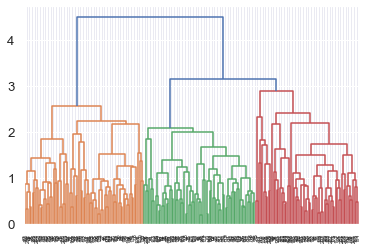

In [103]:
lnk1 = linkage(scaled_df, method='average')
dend = dendrogram(lnk1)


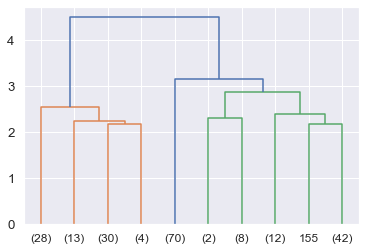

In [104]:
dend = dendrogram(lnk1,
                truncate_mode = 'lastp',
                p=10,)

In [105]:
test_df = pd.DataFrame(columns= ['n_cluster2','n_cluster3', 'n_cluster4'])
test_df

Empty DataFrame
Columns: [n_cluster2, n_cluster3, n_cluster4]
Index: []

In [106]:
for i in np.arange(2,5):
    A_cluster = AgglomerativeClustering(n_clusters=i, linkage='average', affinity= 'cityblock' )
    A_cluster.fit(scaled_df)
    print('n_clusters: {}'.format(i))
    print('Silhouette_score: {} ' .format(silhouette_score(scaled_df, A_cluster.labels_)))
    print(np.array(A_cluster.labels_), '\n')
    test_df.iloc[:,i-2] = pd.Series(A_cluster.labels_)


n_clusters: 2
Silhouette_score: 0.4604968426290829 
[1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0] 

n_clusters: 3
Silhouette_score: 0.35596263944898043 
[1 2 1 0 1 0 0 2 1 0 1 2 0 1 0 0 2 0 0 0 0 0 1 0 2 1 0 0 0 0 2 0 0 2 0 0 0
 0 0 1 1 2 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 2 0 0 1 2 1 1 2 1 0 2 0 1 1
 0 1 2 0 1 2 2 0 2 1 0 2 1 1 1 0 2 1 2 0 0 1 1 1 0 1 0 1 2 1 2 1 1 0 0 1 2
 2 1 0 0 1 2 0 0 1 0 0 0 0 2 2 1 0 2 2 0 2 0 1 0 1 1 0 1 2 1 2 0 0 0 0 1 0
 2 0 2 0 2 1 0 2 0 0 2 1 1 0 1 1 1 0 1 2 0 0 2 0 2 1 1 1 2 0 1 0 2 0 0 2 1
 1 0 2 0 0 0 2 0 1 2 1 1 0 1 0 2 1 2 0 1 2 1 2 1 2] 

n_clusters: 4
Silhouette_score: 0.338

In [107]:
test_df

n_cluster2  n_cluster3  n_cluster4
0             1           1           0
1             0           2           2
2             1           1           0
3             0           0           1
4             1           1           0
..          ...         ...         ...
205           0           2           2
206           1           1           0
207           0           2           2
208           1           1           0
209           0           2           2

[210 rows x 3 columns]

In [108]:
agg_cluster = clustering_df.copy()
agg_cluster = pd.concat([agg_cluster, test_df], axis=1)
agg_cluster

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                     0.875200            6.675   
1       15.99             14.89                     0.906400            5.363   
2       18.95             16.42                     0.882900            6.248   
3       10.83             12.96                     0.810588            5.278   
4       17.99             15.86                     0.899200            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                     0.888000            5.439   
206     16.77             15.62                     0.863800            5.927   
207     14.03             14.16                     0.879600            5.438   
208     16.12             15.00                     0.900000            5.709   
209     15.57             15.15                     0.852700            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  n_cluster2  \
0           3.763            3.252                         6.550           1   
1           3.582            3.336                         5.144           0   
2           3.755            3.368                         6.148           1   
3           2.641            5.182                         5.185           0   
4           3.694            2.068                         5.837           1   
..            ...              ...                           ...         ...   
205         3.199            3.986                         4.738           0   
206         3.438            4.920                         5.795           1   
207         3.201            1.717                         5.001           0   
208         3.485            2.270                         5.443           1   
209         3.231            2.640                         5.879           0   

     n_cluster3  n_cluster4  
0             1           0  
1             2           2  
2             1           0  
3             0           1  
4             1           0  
..          ...         ...  
205           2           2  
206           1           0  
207           2           2  
208           1           0  
209           2           2  

[210 rows x 10 columns]

In [109]:
col = agg_cluster.columns
col =['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'n_cluster2', 'n_cluster3',
       'n_cluster4' ]
agg_cluster= agg_cluster[col]
agg_cluster

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                     0.875200            6.675   
1       15.99             14.89                     0.906400            5.363   
2       18.95             16.42                     0.882900            6.248   
3       10.83             12.96                     0.810588            5.278   
4       17.99             15.86                     0.899200            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                     0.888000            5.439   
206     16.77             15.62                     0.863800            5.927   
207     14.03             14.16                     0.879600            5.438   
208     16.12             15.00                     0.900000            5.709   
209     15.57             15.15                     0.852700            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  n_cluster2  \
0           3.763            3.252                         6.550           1   
1           3.582            3.336                         5.144           0   
2           3.755            3.368                         6.148           1   
3           2.641            5.182                         5.185           0   
4           3.694            2.068                         5.837           1   
..            ...              ...                           ...         ...   
205         3.199            3.986                         4.738           0   
206         3.438            4.920                         5.795           1   
207         3.201            1.717                         5.001           0   
208         3.485            2.270                         5.443           1   
209         3.231            2.640                         5.879           0   

     n_cluster3  n_cluster4  
0             1           0  
1             2           2  
2             1           0  
3             0           1  
4             1           0  
..          ...         ...  
205           2           2  
206           1           0  
207           2           2  
208           1           0  
209           2           2  

[210 rows x 10 columns]

In [110]:
agg_cluster.head()
dfi.export(agg_cluster.head(), 'Agg_cluster.png')

In [111]:
sns.set(font_scale=1.2)

<AxesSubplot:xlabel='spending', ylabel='max_spent_in_single_shopping'>

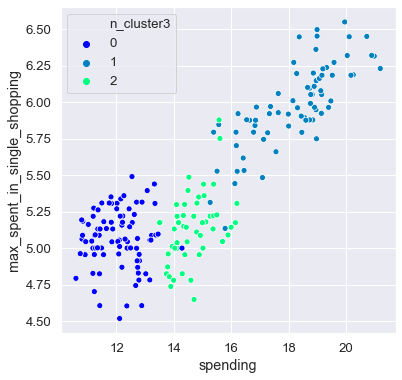

In [112]:
plt.figure(figsize=(6,6))
sns.scatterplot(data= agg_cluster, y = 'max_spent_in_single_shopping', x = 'spending', 
                hue='n_cluster3', palette='winter')

<AxesSubplot:xlabel='spending', ylabel='min_payment_amt'>

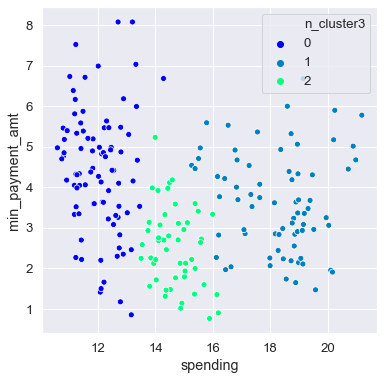

In [113]:
plt.figure(figsize=(6,6))
sns.scatterplot(data= agg_cluster, y = 'min_payment_amt', x = 'spending', 
                hue='n_cluster3', palette='winter')

In [114]:
clustering_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

<AxesSubplot:xlabel='spending', ylabel='advance_payments'>

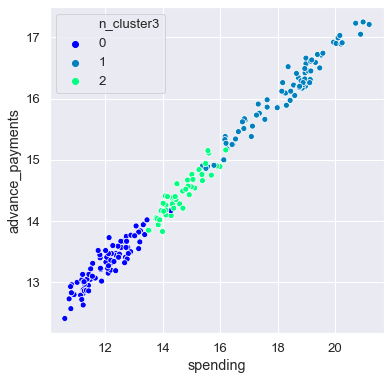

In [115]:
plt.figure(figsize=(6,6))
sns.scatterplot(data= agg_cluster, y = 'advance_payments', x = 'spending', 
                hue='n_cluster3', palette='winter')

<AxesSubplot:xlabel='spending', ylabel='credit_limit'>

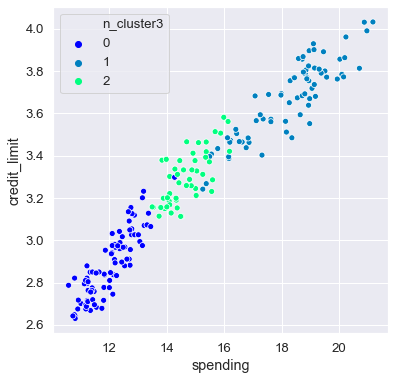

In [116]:
plt.figure(figsize=(6,6))
sns.scatterplot(data= agg_cluster, y = 'credit_limit', x = 'spending', 
                hue='n_cluster3', palette='winter')

-->Both the methods have almost similer means with some minimum variation.

-->Cluster grouping based on the dendrogram, 3 or 4 clusters looks good.

-->After further analysis, based on the dataset we get 3 group cluster solution for hierarchical clustering.

-->The 3 group cluster solution gives us the pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made).

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.

In [117]:
from sklearn.cluster import KMeans

In [118]:
wss= []

In [119]:
for i in np.arange(1,13):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(scaled_df)
    wss.append(km.inertia_)

In [120]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 371.2217639268478,
 326.88464076818576,
 290.1513312373964,
 263.0291032947616,
 242.81070733171134,
 221.48759698221107,
 206.3290465077041,
 192.79444647486605,
 186.4077883644465]

Text(0.5, 1.0, 'Elbow curve')

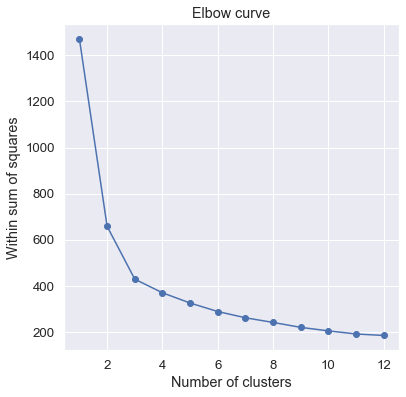

In [121]:
plt.figure(figsize=(6,6))
plt.plot( range(1,13),wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within sum of squares')
plt.title('Elbow curve')

In [122]:
km = KMeans(n_clusters=3, random_state=1)
km_cluster = km.fit_predict(scaled_df)
km_cluster

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [123]:
kmeans_cluster = clustering_df.copy()
kmeans_cluster['Kmean_clust']= km_cluster
kmeans_cluster['Sil_width'] = silhouette_samples(scaled_df, km_cluster)
kmeans_cluster.to_csv('Kmeans_cluster.csv')
print('Sil_score_3: ', silhouette_score(scaled_df, km_cluster))
kmeans_cluster

Sil_score_3:  0.4008059221522216


spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                     0.875200            6.675   
1       15.99             14.89                     0.906400            5.363   
2       18.95             16.42                     0.882900            6.248   
3       10.83             12.96                     0.810588            5.278   
4       17.99             15.86                     0.899200            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                     0.888000            5.439   
206     16.77             15.62                     0.863800            5.927   
207     14.03             14.16                     0.879600            5.438   
208     16.12             15.00                     0.900000            5.709   
209     15.57             15.15                     0.852700            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  Kmean_clust  \
0           3.763            3.252                         6.550            0   
1           3.582            3.336                         5.144            2   
2           3.755            3.368                         6.148            0   
3           2.641            5.182                         5.185            1   
4           3.694            2.068                         5.837            0   
..            ...              ...                           ...          ...   
205         3.199            3.986                         4.738            2   
206         3.438            4.920                         5.795            0   
207         3.201            1.717                         5.001            2   
208         3.485            2.270                         5.443            2   
209         3.231            2.640                         5.879            2   

     Sil_width  
0     0.573278  
1     0.365564  
2     0.637092  
3     0.515595  
4     0.360972  
..         ...  
205   0.308036  
206   0.267423  
207   0.505922  
208   0.257174  
209   0.042063  

[210 rows x 9 columns]

In [124]:
kmeans_cluster[kmeans_cluster.Sil_width<0]

Empty DataFrame
Columns: [spending, advance_payments, probability_of_full_payment, current_balance, credit_limit, min_payment_amt, max_spent_in_single_shopping, Kmean_clust, Sil_width]
Index: []

In [125]:
kmeans_cluster[kmeans_cluster.Kmean_clust==1].describe().T

count       mean       std        min  \
spending                       72.0  11.856944  0.714801  10.590000   
advance_payments               72.0  13.247778  0.355208  12.410000   
probability_of_full_payment    72.0   0.848330  0.019800   0.810588   
current_balance                72.0   5.231750  0.141795   4.899000   
credit_limit                   72.0   2.849542  0.138689   2.630000   
min_payment_amt                72.0   4.733892  1.332248   1.502000   
max_spent_in_single_shopping   72.0   5.101722  0.184012   4.519000   
Kmean_clust                    72.0   1.000000  0.000000   1.000000   
Sil_width                      72.0   0.399556  0.159393   0.002769   

                                    25%        50%        75%        max  
spending                      11.255000  11.825000  12.395000  13.340000  
advance_payments              12.992500  13.250000  13.482500  13.950000  
probability_of_full_payment    0.835000   0.848600   0.861475   0.888300  
current_balance                5.139250   5.225000   5.337250   5.541000  
credit_limit                   2.738500   2.836500   2.967000   3.232000  
min_payment_amt                4.032250   4.799000   5.463750   8.079625  
max_spent_in_single_shopping   5.001000   5.089000   5.223500   5.491000  
Kmean_clust                    1.000000   1.000000   1.000000   1.000000  
Sil_width                      0.316372   0.459725   0.516781   0.588665

In [126]:
kmeans_cluster[kmeans_cluster.Kmean_clust==2].describe().T

count       mean       std        min  \
spending                       71.0  14.437887  1.056513  12.080000   
advance_payments               71.0  14.337746  0.525706  13.150000   
probability_of_full_payment    71.0   0.881597  0.015502   0.852700   
current_balance                71.0   5.514577  0.225266   4.984000   
credit_limit                   71.0   3.259225  0.154766   2.936000   
min_payment_amt                71.0   2.707341  1.176440   0.765100   
max_spent_in_single_shopping   71.0   5.120803  0.269558   4.605000   
Kmean_clust                    71.0   2.000000  0.000000   2.000000   
Sil_width                      71.0   0.338593  0.166214   0.004485   

                                    25%        50%        75%        max  
spending                      13.820000  14.430000  15.260000  16.440000  
advance_payments              14.030000  14.390000  14.760000  15.270000  
probability_of_full_payment    0.871300   0.881900   0.893350   0.918300  
current_balance                5.380000   5.541000   5.689500   5.920000  
credit_limit                   3.155000   3.258000   3.378000   3.582000  
min_payment_amt                1.951000   2.640000   3.332000   6.685000  
max_spent_in_single_shopping   4.958500   5.132000   5.263500   5.879000  
Kmean_clust                    2.000000   2.000000   2.000000   2.000000  
Sil_width                      0.232968   0.369166   0.478726   0.552973

In [127]:
kmeans_cluster[kmeans_cluster.Kmean_clust==0].describe().T

count       mean       std        min  \
spending                       67.0  18.495373  1.277122  15.560000   
advance_payments               67.0  16.203433  0.546439  14.890000   
probability_of_full_payment    67.0   0.884210  0.014917   0.845200   
current_balance                67.0   6.175687  0.237807   5.718000   
credit_limit                   67.0   3.697537  0.166014   3.387000   
min_payment_amt                67.0   3.632373  1.211052   1.472000   
max_spent_in_single_shopping   67.0   6.041701  0.229566   5.484000   
Kmean_clust                    67.0   0.000000  0.000000   0.000000   
Sil_width                      67.0   0.468077  0.153426   0.030368   

                                    25%        50%        75%        max  
spending                      17.590000  18.750000  19.145000  21.180000  
advance_payments              15.855000  16.230000  16.580000  17.250000  
probability_of_full_payment    0.874650   0.882900   0.898050   0.910800  
current_balance                6.011500   6.153000   6.328000   6.675000  
credit_limit                   3.564500   3.719000   3.808000   4.033000  
min_payment_amt                2.848000   3.619000   4.421000   6.682000  
max_spent_in_single_shopping   5.879000   6.009000   6.192500   6.550000  
Kmean_clust                    0.000000   0.000000   0.000000   0.000000  
Sil_width                      0.418991   0.522797   0.573763   0.638681

In [128]:
kmeans_cluster.groupby('Kmean_clust').mean().sort_values('spending').T

Kmean_clust                           1          2          0
spending                      11.856944  14.437887  18.495373
advance_payments              13.247778  14.337746  16.203433
probability_of_full_payment    0.848330   0.881597   0.884210
current_balance                5.231750   5.514577   6.175687
credit_limit                   2.849542   3.259225   3.697537
min_payment_amt                4.733892   2.707341   3.632373
max_spent_in_single_shopping   5.101722   5.120803   6.041701
Sil_width                      0.399556   0.338593   0.468077

In [129]:
kmeans_cluster.Kmean_clust.value_counts().sort_index()

0    67
1    72
2    71
Name: Kmean_clust, dtype: int64

In [130]:
cpk = kmeans_cluster.groupby('Kmean_clust').mean()
cpk['Freq'] = kmeans_cluster.Kmean_clust.value_counts().sort_index()
cpk

spending  advance_payments  probability_of_full_payment  \
Kmean_clust                                                             
0            18.495373         16.203433                     0.884210   
1            11.856944         13.247778                     0.848330   
2            14.437887         14.337746                     0.881597   

             current_balance  credit_limit  min_payment_amt  \
Kmean_clust                                                   
0                   6.175687      3.697537         3.632373   
1                   5.231750      2.849542         4.733892   
2                   5.514577      3.259225         2.707341   

             max_spent_in_single_shopping  Sil_width  Freq  
Kmean_clust                                                 
0                                6.041701   0.468077    67  
1                                5.101722   0.399556    72  
2                                5.120803   0.338593    71

In [131]:
kmeans_cluster.iloc[:,:-2].iloc[:,-1]

0      6.550
1      5.144
2      6.148
3      5.185
4      5.837
       ...  
205    4.738
206    5.795
207    5.001
208    5.443
209    5.879
Name: max_spent_in_single_shopping, Length: 210, dtype: float64

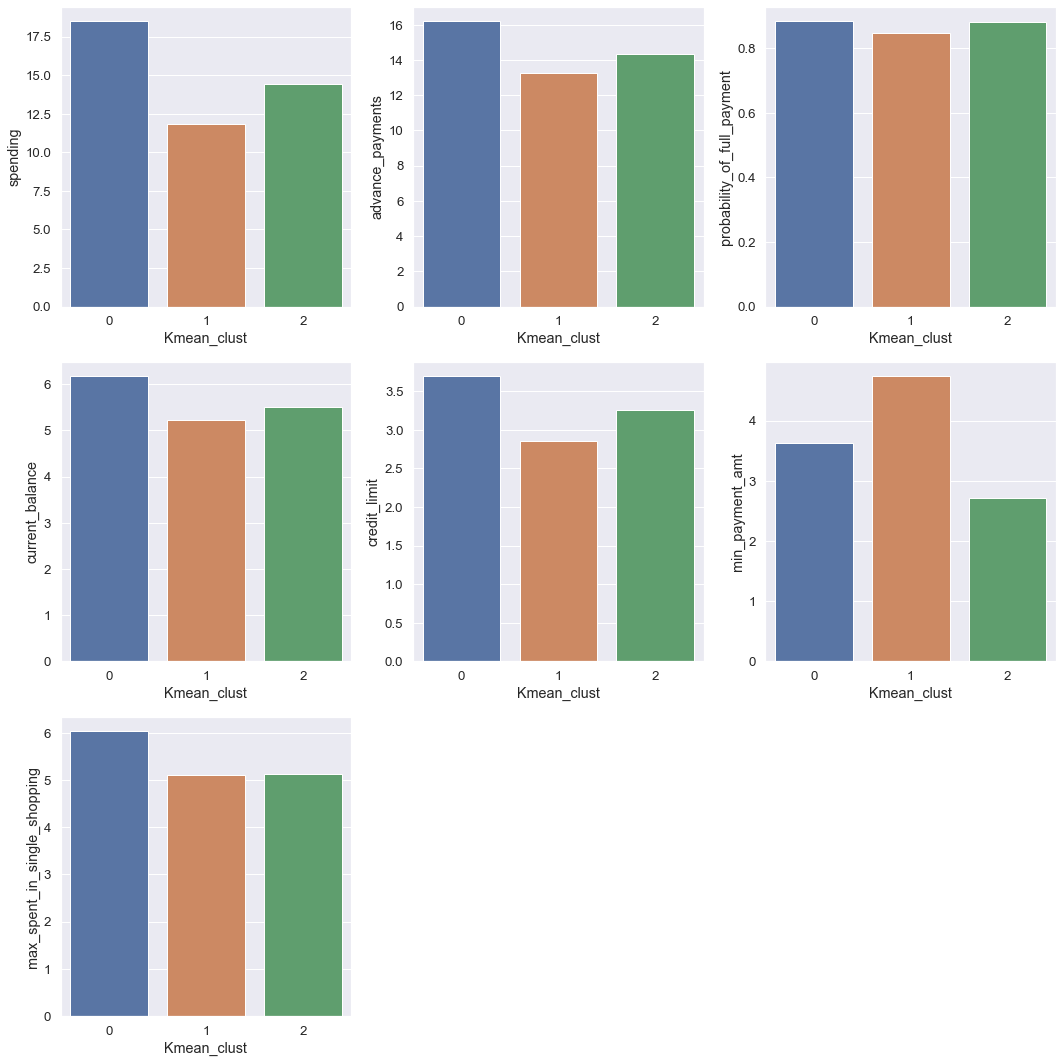

In [132]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15,15))
for i in np.arange(len(kmeans_cluster.columns[:-2])):
    plt.subplot(3,3, i+1)
    sns.barplot(data= kmeans_cluster, x = 'Kmean_clust', y=kmeans_cluster.iloc[:,i],ci=0, estimator=np.mean )
    plt.tight_layout()
    plt.savefig('Barplot.png')

<AxesSubplot:xlabel='probability_of_full_payment', ylabel='spending'>

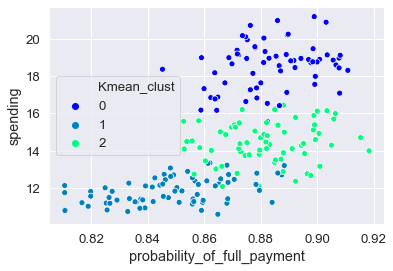

In [133]:
sns.scatterplot(data= kmeans_cluster, x='probability_of_full_payment', y= 'spending', hue='Kmean_clust', palette='winter')

<AxesSubplot:xlabel='probability_of_full_payment', ylabel='credit_limit'>

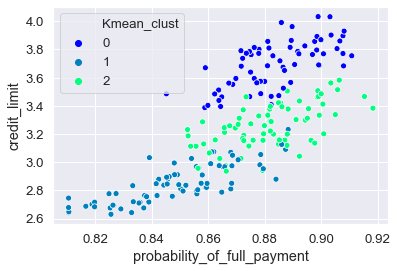

In [134]:
sns.scatterplot(data= kmeans_cluster, x='probability_of_full_payment', y= 'credit_limit', hue='Kmean_clust', palette='winter')

<AxesSubplot:xlabel='credit_limit', ylabel='max_spent_in_single_shopping'>

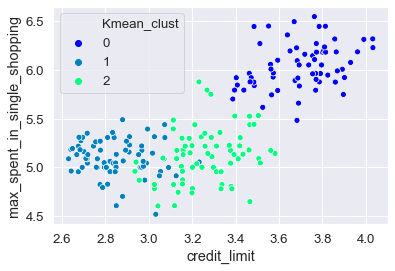

In [135]:
sns.scatterplot(data= kmeans_cluster, y='max_spent_in_single_shopping', x= 'credit_limit', hue='Kmean_clust', palette='winter')

<AxesSubplot:xlabel='spending', ylabel='current_balance'>

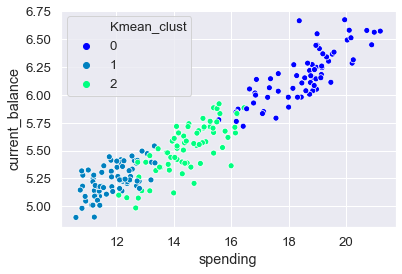

In [136]:
sns.scatterplot(data= kmeans_cluster, x='spending', y= 'current_balance', hue='Kmean_clust', palette='winter')

<AxesSubplot:xlabel='current_balance', ylabel='spending'>

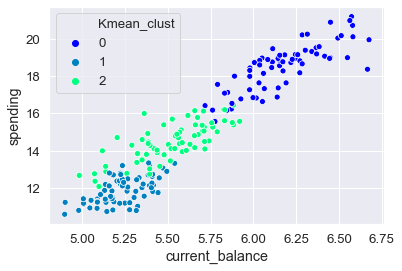

In [137]:
sns.scatterplot(data= kmeans_cluster, y='spending', x= 'current_balance', hue='Kmean_clust', palette='winter')

<Figure size 7200x7200 with 0 Axes>

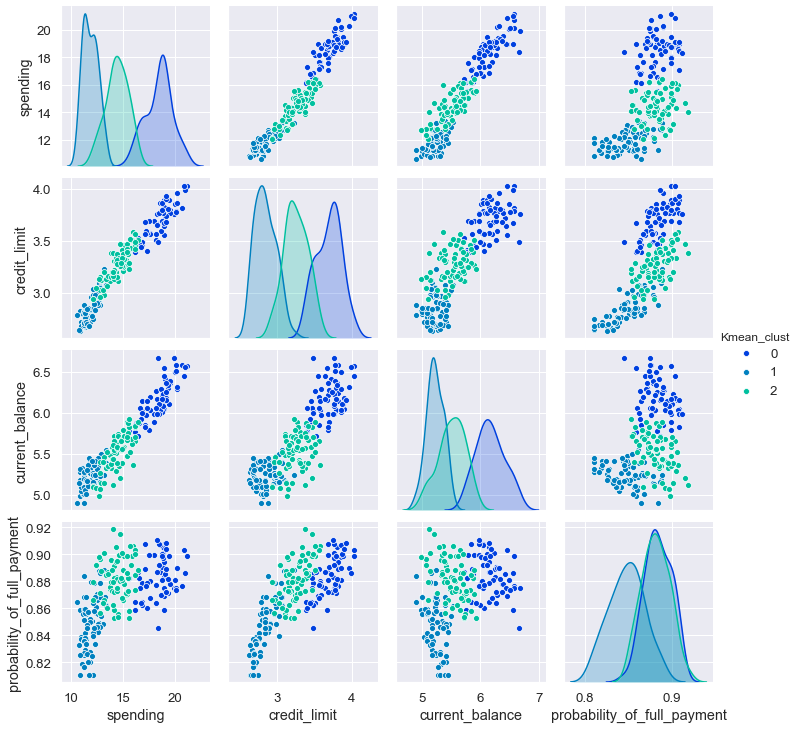

In [138]:
plt.figure(figsize=(100,100))
sns.pairplot(data= kmeans_cluster, 
             y_vars=['spending', 'credit_limit', 'current_balance', 'probability_of_full_payment'],
             x_vars=['spending', 'credit_limit', 'current_balance', 'probability_of_full_payment'],
             hue='Kmean_clust', palette='winter')
plt.savefig('Clustered_pairplot.png')

Here we can see that, cluster 1 is the highest spender & cluster_0 is the least spender among them

In cluster_2, those who have less current_balance and high spending offer them specail loan to fulfil their requirements would increse revenue for the bank (spending vs current_balance plot).

In cluster_0 those whose spending is equal or close to average spending of cluster_2 increase their credit_limit would lead them to purchase more with their card and ultimately benefit the bank (credit_limit vs spending).

One thing is abnormal, that is high minimum payment amount for cluster_0 who are the least spender while the same for cluster_1 and cluster_2 are significantly lower.

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.

Group 1 : High Spending
    
Group 3 : Medium Spending
    
Group 2 : Low Spending
    
Promotional strategies for each cluster

Group 1 : High Spending Group
- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxary brands, which will drive more one_time_maximun spending.

Group 3 : Medium Spending Group
- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more.

Group 2 : Low Spending Group
- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)

# Problem 2:

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Dataset for Problem 2: insurance_part2_data-1.csv

Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)

## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import stats from scipy
from scipy import stats

In [140]:
insurance_df = pd.read_csv('insurance_part2_data.csv')

In [141]:
insurance_df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
0      48         C2B       Airlines      No       0.70  Online         7   
1      36         EPX  Travel Agency      No       0.00  Online        34   
2      39         CWT  Travel Agency      No       5.94  Online         3   
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
...   ...         ...            ...     ...        ...     ...       ...   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2998   34         C2B       Airlines     Yes       7.64  Online        39   
2999   47         JZI       Airlines      No      11.55  Online        15   

       Sales       Product Name Destination  
0       2.51    Customised Plan        ASIA  
1      20.00    Customised Plan        ASIA  
2       9.90    Customised Plan    Americas  
3      26.00  Cancellation Plan        ASIA  
4      18.00        Bronze Plan        ASIA  
...      ...                ...         ...  
2995  256.20          Gold Plan    Americas  
2996   54.00          Gold Plan        ASIA  
2997   28.00    Customised Plan        ASIA  
2998   30.55        Bronze Plan        ASIA  
2999   33.00        Bronze Plan        ASIA  

[3000 rows x 10 columns]

In [142]:
insurance_df.head()

Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   48         C2B       Airlines      No       0.70  Online         7   2.51   
1   36         EPX  Travel Agency      No       0.00  Online        34  20.00   
2   39         CWT  Travel Agency      No       5.94  Online         3   9.90   
3   36         EPX  Travel Agency      No       0.00  Online         4  26.00   
4   33         JZI       Airlines      No       6.30  Online        53  18.00   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA

In [143]:
insurance_df.tail()

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2998   34         C2B       Airlines     Yes       7.64  Online        39   
2999   47         JZI       Airlines      No      11.55  Online        15   

       Sales     Product Name Destination  
2995  256.20        Gold Plan    Americas  
2996   54.00        Gold Plan        ASIA  
2997   28.00  Customised Plan        ASIA  
2998   30.55      Bronze Plan        ASIA  
2999   33.00      Bronze Plan        ASIA

In [144]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


The dataset having 10 features with 3000 records and no missing values.

Age, commission, duration , sales are numeric variables and the other variables are categorical.

There are 9 independent variables and one target variable -- Claimed.

In [145]:
#Checking missing values

insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [146]:
insurance_df.isnull().sum().any() # the data has no missing values

False

In [147]:
insurance_df.shape

(3000, 10)

In [148]:
insurance_df.size

30000

In [ ]:
ins[ins.duplicated()]

In [149]:
# Discriptive Analysis

insurance_df.describe()

Age    Commision     Duration        Sales
count  3000.000000  3000.000000  3000.000000  3000.000000
mean     38.091000    14.529203    70.001333    60.249913
std      10.463518    25.481455   134.053313    70.733954
min       8.000000     0.000000    -1.000000     0.000000
25%      32.000000     0.000000    11.000000    20.000000
50%      36.000000     4.630000    26.500000    33.000000
75%      42.000000    17.235000    63.000000    69.000000
max      84.000000   210.210000  4580.000000   539.000000

In [150]:
insurance_df.describe().T

count       mean         std  min   25%    50%     75%      max
Age        3000.0  38.091000   10.463518  8.0  32.0  36.00  42.000    84.00
Commision  3000.0  14.529203   25.481455  0.0   0.0   4.63  17.235   210.21
Duration   3000.0  70.001333  134.053313 -1.0  11.0  26.50  63.000  4580.00
Sales      3000.0  60.249913   70.733954  0.0  20.0  33.00  69.000   539.00

The feature duration has negative values, this might be the wrong entry.

For Commision & sales, mean and median significantly vary.

In [151]:
insurance_df.describe(include ='all').T

count unique              top  freq       mean         std  \
Age           3000.0    NaN              NaN   NaN     38.091   10.463518   
Agency_Code     3000      4              EPX  1365        NaN         NaN   
Type            3000      2    Travel Agency  1837        NaN         NaN   
Claimed         3000      2               No  2076        NaN         NaN   
Commision     3000.0    NaN              NaN   NaN  14.529203   25.481455   
Channel         3000      2           Online  2954        NaN         NaN   
Duration      3000.0    NaN              NaN   NaN  70.001333  134.053313   
Sales         3000.0    NaN              NaN   NaN  60.249913   70.733954   
Product Name    3000      5  Customised Plan  1136        NaN         NaN   
Destination     3000      3             ASIA  2465        NaN         NaN   

              min   25%   50%     75%     max  
Age           8.0  32.0  36.0    42.0    84.0  
Agency_Code   NaN   NaN   NaN     NaN     NaN  
Type          NaN   NaN   NaN     NaN     NaN  
Claimed       NaN   NaN   NaN     NaN     NaN  
Commision     0.0   0.0  4.63  17.235  210.21  
Channel       NaN   NaN   NaN     NaN     NaN  
Duration     -1.0  11.0  26.5    63.0  4580.0  
Sales         0.0  20.0  33.0    69.0   539.0  
Product Name  NaN   NaN   NaN     NaN     NaN  
Destination   NaN   NaN   NaN     NaN     NaN

categorical variable maximum unique count is 5.

In [152]:
for column in insurance_df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',insurance_df[column].nunique())
    print(insurance_df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [153]:
# checking for duplicates
#There are 139 duplicate rows present in the data. We should not drop duplicates from the data.
#Because we don’t know whether these are same passengers or different as id or name is not given
dups = insurance_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
insurance_df[dups]

Number of duplicate rows = 139


Age Agency_Code           Type Claimed  Commision Channel  Duration  \
63     30         C2B       Airlines     Yes       15.0  Online        27   
329    36         EPX  Travel Agency      No        0.0  Online         5   
407    36         EPX  Travel Agency      No        0.0  Online        11   
411    35         EPX  Travel Agency      No        0.0  Online         2   
422    36         EPX  Travel Agency      No        0.0  Online         5   
...   ...         ...            ...     ...        ...     ...       ...   
2940   36         EPX  Travel Agency      No        0.0  Online         8   
2947   36         EPX  Travel Agency      No        0.0  Online        10   
2952   36         EPX  Travel Agency      No        0.0  Online         2   
2962   36         EPX  Travel Agency      No        0.0  Online         4   
2984   36         EPX  Travel Agency      No        0.0  Online         1   

      Sales       Product Name Destination  
63     60.0        Bronze Plan        ASIA  
329    20.0    Customised Plan        ASIA  
407    19.0  Cancellation Plan        ASIA  
411    20.0    Customised Plan        ASIA  
422    20.0    Customised Plan        ASIA  
...     ...                ...         ...  
2940   10.0  Cancellation Plan        ASIA  
2947   28.0    Customised Plan        ASIA  
2952   10.0  Cancellation Plan        ASIA  
2962   20.0    Customised Plan        ASIA  
2984   20.0    Customised Plan        ASIA  

[139 rows x 10 columns]

In [154]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [155]:
obj_col = [col for col in insurance_df.columns if insurance_df[col].dtype=='object']
obj_col

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

In [156]:
insurance_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

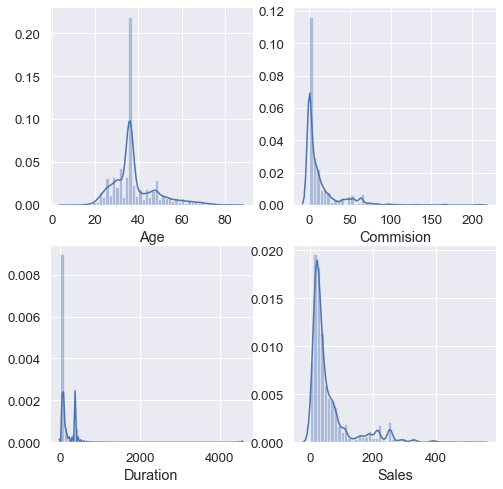

In [157]:
sns.set(font_scale =1.2)
plt.figure(figsize=(8,8))
for i in np.arange(len(insurance_df.select_dtypes(exclude='object').columns)):
    plt.subplot(2,2, i+1)
    sns.distplot(insurance_df.select_dtypes(exclude='object').iloc[:,i])
plt.savefig('Distplot')    

In [158]:
insurance_df.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

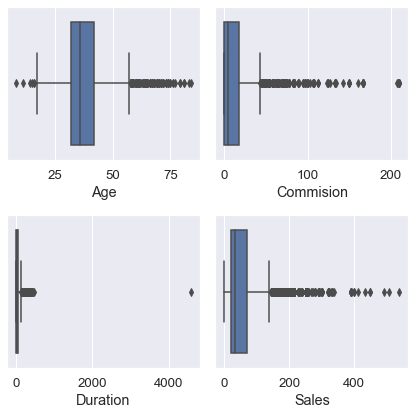

In [159]:
plt.figure(figsize=(6,6))
for i in np.arange(len(insurance_df.select_dtypes(exclude='object').columns)):
    plt.subplot(2,2, i+1)
    sns.boxplot(data = insurance_df, x = insurance_df.select_dtypes(exclude='object').columns[i] )
    plt.tight_layout()
plt.savefig('Boxplot')    

In [160]:
insurance_df.describe()

Age    Commision     Duration        Sales
count  3000.000000  3000.000000  3000.000000  3000.000000
mean     38.091000    14.529203    70.001333    60.249913
std      10.463518    25.481455   134.053313    70.733954
min       8.000000     0.000000    -1.000000     0.000000
25%      32.000000     0.000000    11.000000    20.000000
50%      36.000000     4.630000    26.500000    33.000000
75%      42.000000    17.235000    63.000000    69.000000
max      84.000000   210.210000  4580.000000   539.000000

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

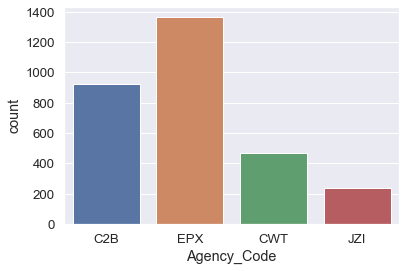

In [161]:
#Categorical variables
sns.countplot(data= insurance_df, x= 'Agency_Code')

<AxesSubplot:xlabel='Claimed', ylabel='count'>

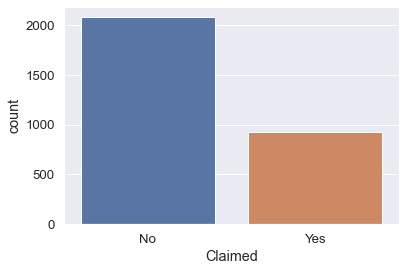

In [162]:
sns.countplot(data= insurance_df, x= 'Claimed')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

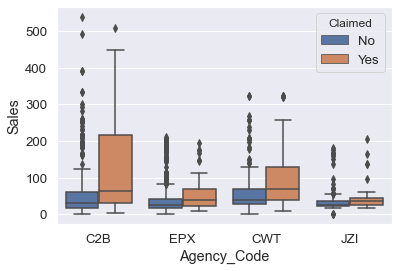

In [163]:
sns.boxplot(data = insurance_df,x='Agency_Code',y='Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Type', ylabel='count'>

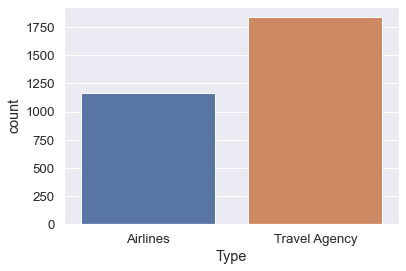

In [164]:
sns.countplot(data=insurance_df,x='Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

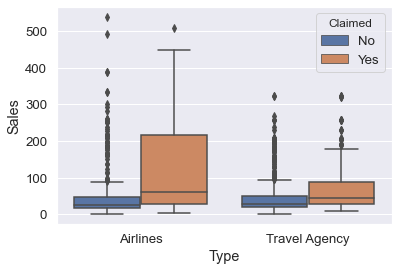

In [165]:
sns.boxplot(data = insurance_df,x='Type',y='Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Channel', ylabel='count'>

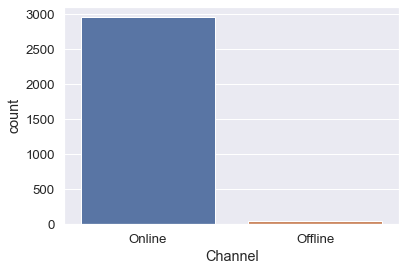

In [166]:
sns.countplot(data=insurance_df,x='Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

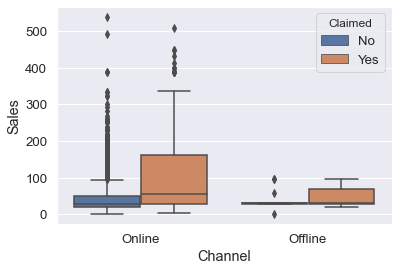

In [167]:
sns.boxplot(data = insurance_df,x='Channel',y='Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='count'>

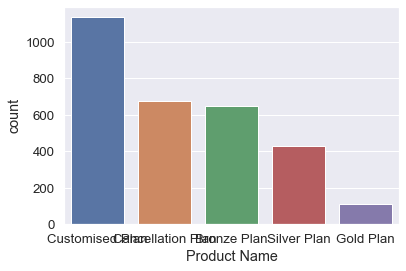

In [168]:
sns.countplot(data=insurance_df,x='Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

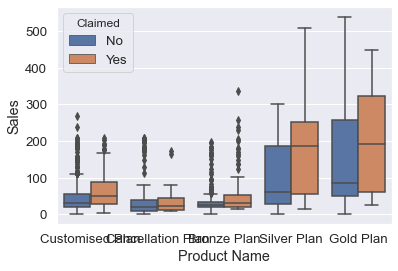

In [169]:
sns.boxplot(data = insurance_df,x='Product Name',y='Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Destination', ylabel='count'>

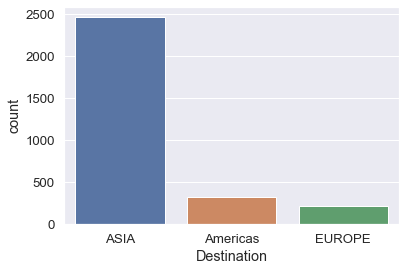

In [170]:
sns.countplot(data=insurance_df,x='Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

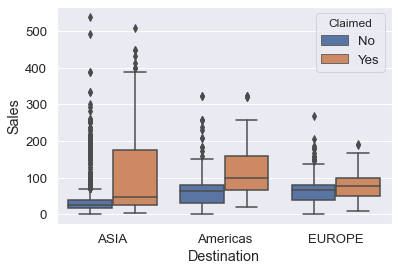

In [171]:
sns.boxplot(data = insurance_df,x='Destination',y='Sales', hue = 'Claimed')

In [172]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [173]:
col = insurance_df.select_dtypes(exclude='object').columns
col

Index(['Age', 'Commision', 'Duration', 'Sales'], dtype='object')

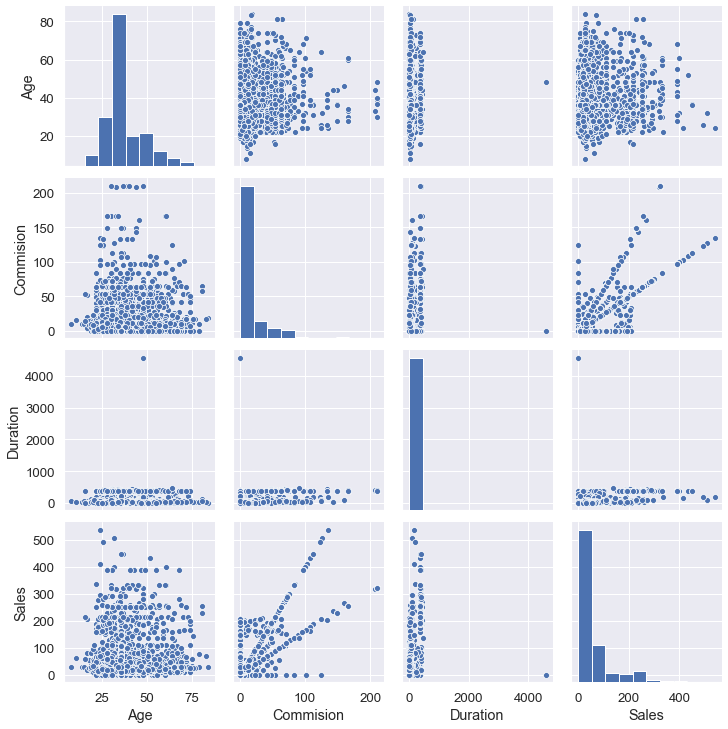

In [174]:
sns.pairplot(insurance_df)


<AxesSubplot:>

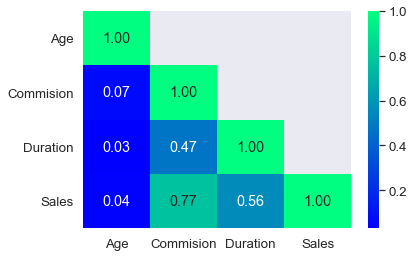

In [175]:
corr = insurance_df[col].corr()
msk = np.triu(corr, +1)
sns.heatmap(corr, annot=True, fmt='1.2f', cmap='winter', mask=msk)

In [176]:
#converting all objects to categorical codes
for feature in insurance_df.columns: 
    if insurance_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insurance_df[feature].unique()))
        print(pd.Categorical(insurance_df[feature].unique()).codes)
        insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [177]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [178]:
insurance_df.head()

Age  Agency_Code  Type  Claimed  Commision  Channel  Duration  Sales  \
0   48            0     0        0       0.70        1         7   2.51   
1   36            2     1        0       0.00        1        34  20.00   
2   39            1     1        0       5.94        1         3   9.90   
3   36            2     1        0       0.00        1         4  26.00   
4   33            3     0        0       6.30        1        53  18.00   

   Product Name  Destination  
0             2            0  
1             2            0  
2             2            1  
3             1            0  
4             0            0

In [179]:
ins = insurance_df.copy()
ins['Net_Commision'] = insurance_df.Commision * insurance_df.Sales

In [183]:
ins.head(2)

Age  Agency_Code  Type  Claimed  Commision  Channel  Duration  Sales  \
0   48            0     0        0        0.7        1         7   2.51   
1   36            2     1        0        0.0        1        34  20.00   

   Product Name  Destination  Net_Commision  
0             2            0          1.757  
1             2            0          0.000

In [185]:
ins.groupby('Claimed')['Type'].count()

Claimed
0    2076
1     924
Name: Type, dtype: int64

In [186]:
ins.Claimed.value_counts(normalize=True) #proportion of zeroes and ones

0    0.692
1    0.308
Name: Claimed, dtype: float64

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

In [187]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.neural_network import MLPClassifier

In [188]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [189]:
chnl = pd.get_dummies(insurance_df.Channel, prefix='Channel', prefix_sep='_', drop_first=True )


In [190]:
typ = pd.get_dummies(insurance_df.Type, drop_first=True )
typ

1
0     0
1     1
2     1
3     1
4     0
...  ..
2995  1
2996  0
2997  1
2998  0
2999  0

[3000 rows x 1 columns]

In [191]:
ins = pd.concat([ins,chnl,typ], axis=1)
ins.drop(['Channel', 'Type'], axis=1, inplace=True)

In [192]:
ins

Age  Agency_Code  Claimed  Commision  Duration   Sales  Product Name  \
0      48            0        0       0.70         7    2.51             2   
1      36            2        0       0.00        34   20.00             2   
2      39            1        0       5.94         3    9.90             2   
3      36            2        0       0.00         4   26.00             1   
4      33            3        0       6.30        53   18.00             0   
...   ...          ...      ...        ...       ...     ...           ...   
2995   28            1        1     166.53       364  256.20             3   
2996   35            0        0      13.50         5   54.00             3   
2997   36            2        0       0.00        54   28.00             2   
2998   34            0        1       7.64        39   30.55             0   
2999   47            3        0      11.55        15   33.00             0   

      Destination  Net_Commision  Channel_1  1  
0               0          1.757          1  0  
1               0          0.000          1  1  
2               1         58.806          1  1  
3               0          0.000          1  1  
4               0        113.400          1  0  
...           ...            ...        ... ..  
2995            1      42664.986          1  1  
2996            0        729.000          1  0  
2997            0          0.000          1  1  
2998            0        233.402          1  0  
2999            0        381.150          1  0  

[3000 rows x 11 columns]

In [193]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            3000 non-null   int64  
 1   Agency_Code    3000 non-null   int8   
 2   Claimed        3000 non-null   int8   
 3   Commision      3000 non-null   float64
 4   Duration       3000 non-null   int64  
 5   Sales          3000 non-null   float64
 6   Product Name   3000 non-null   int8   
 7   Destination    3000 non-null   int8   
 8   Net_Commision  3000 non-null   float64
 9   Channel_1      3000 non-null   uint8  
 10  1              3000 non-null   uint8  
dtypes: float64(3), int64(2), int8(4), uint8(2)
memory usage: 134.9 KB


In [194]:
ins

Age  Agency_Code  Claimed  Commision  Duration   Sales  Product Name  \
0      48            0        0       0.70         7    2.51             2   
1      36            2        0       0.00        34   20.00             2   
2      39            1        0       5.94         3    9.90             2   
3      36            2        0       0.00         4   26.00             1   
4      33            3        0       6.30        53   18.00             0   
...   ...          ...      ...        ...       ...     ...           ...   
2995   28            1        1     166.53       364  256.20             3   
2996   35            0        0      13.50         5   54.00             3   
2997   36            2        0       0.00        54   28.00             2   
2998   34            0        1       7.64        39   30.55             0   
2999   47            3        0      11.55        15   33.00             0   

      Destination  Net_Commision  Channel_1  1  
0               0          1.757          1  0  
1               0          0.000          1  1  
2               1         58.806          1  1  
3               0          0.000          1  1  
4               0        113.400          1  0  
...           ...            ...        ... ..  
2995            1      42664.986          1  1  
2996            0        729.000          1  0  
2997            0          0.000          1  1  
2998            0        233.402          1  0  
2999            0        381.150          1  0  

[3000 rows x 11 columns]

In [195]:
ins1 = ins.drop('Net_Commision', axis=1)
ins1

Age  Agency_Code  Claimed  Commision  Duration   Sales  Product Name  \
0      48            0        0       0.70         7    2.51             2   
1      36            2        0       0.00        34   20.00             2   
2      39            1        0       5.94         3    9.90             2   
3      36            2        0       0.00         4   26.00             1   
4      33            3        0       6.30        53   18.00             0   
...   ...          ...      ...        ...       ...     ...           ...   
2995   28            1        1     166.53       364  256.20             3   
2996   35            0        0      13.50         5   54.00             3   
2997   36            2        0       0.00        54   28.00             2   
2998   34            0        1       7.64        39   30.55             0   
2999   47            3        0      11.55        15   33.00             0   

      Destination  Channel_1  1  
0               0          1  0  
1               0          1  1  
2               1          1  1  
3               0          1  1  
4               0          1  0  
...           ...        ... ..  
2995            1          1  1  
2996            0          1  0  
2997            0          1  1  
2998            0          1  0  
2999            0          1  0  

[3000 rows x 10 columns]

In [196]:
x = ins1.drop('Claimed', axis=1)
y=ins1.pop('Claimed')

In [197]:
x.head()#Extracting the target column into separate vectors for training and test set.

Age  Agency_Code  Commision  Duration  Sales  Product Name  Destination  \
0   48            0       0.70         7   2.51             2            0   
1   36            2       0.00        34  20.00             2            0   
2   39            1       5.94         3   9.90             2            1   
3   36            2       0.00         4  26.00             1            0   
4   33            3       6.30        53  18.00             0            0   

   Channel_1  1  
0          1  0  
1          1  1  
2          1  1  
3          1  1  
4          1  0

In [198]:
#splitting data into training and test set.
X_train, X_test, train_labels, test_labels = train_test_split(x,y, random_state=0, train_size=.70)

In [199]:
X_train.shape, X_test.shape

((2100, 9), (900, 9))

In [200]:
#Checking the dimensions of train and the test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


# CART

In [201]:
X_cols = X_train.columns

In [202]:
dt = DecisionTreeClassifier()
dt.fit(X_train, train_labels)
print('Classification report for train data\n', classification_report(train_labels, dt.predict(X_train)))
print(classification_report(test_labels, dt.predict(X_test)))
cart_graphviz = open('cart_proj_graph.dot', 'w')
dot_file = export_graphviz(dt, out_file=cart_graphviz, feature_names= X_cols, class_names=['no', 'yes'] )
cart_graphviz.close()

Classification report for train data
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1464
           1       1.00      0.98      0.99       636

    accuracy                           0.99      2100
   macro avg       1.00      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       612
           1       0.55      0.51      0.53       288

    accuracy                           0.71       900
   macro avg       0.66      0.66      0.66       900
weighted avg       0.70      0.71      0.71       900



In [203]:
param_grid_dt = {'criterion': ['gini', 'entropy'],
                 'min_samples_split': [190,200, 205],
                 'min_samples_leaf': [ 35,40,45],
                 'max_depth': [6,7,8]}
    
dt_model = DecisionTreeClassifier(random_state=0)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid= param_grid_dt, cv=3)
grid_search_dt.fit(X_train, train_labels)


print(grid_search_dt.best_params_)
best_grid_dt= grid_search_dt.best_estimator_

best_grid_dt

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 35, 'min_samples_split': 190}


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=35,
                       min_samples_split=190, random_state=0)

In [204]:
best_grid_dt

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=35,
                       min_samples_split=190, random_state=0)

In [260]:
print(pd.DataFrame(best_grid_dt.feature_importances_,columns = ["Imp"],
                  index = X_train.columns).sort_values('Imp',ascending = False))

                   Imp
Agency_Code   0.520399
Sales         0.277241
Product Name  0.083826
Commision     0.054469
Duration      0.048702
Age           0.015363
Destination   0.000000
Channel_1     0.000000
1             0.000000


# Random Forest

In [206]:
param_grid_rf = {'n_estimators': [300],
                  'criterion': ['gini', 'entropy'],
                  'min_samples_split': [200],
                  'min_samples_leaf': [ 35, 45, 55],
                  'max_depth': [6,7,8],
                 'max_features': [4,5,6]}
    
rfcl = RandomForestClassifier(random_state=0)
grid_search_rf = GridSearchCV(estimator= rfcl, param_grid= param_grid_rf, cv=3)

In [207]:
grid_search_rf.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [35, 45, 55],
                         'min_samples_split': [200], 'n_estimators': [300]})

In [261]:
best_grid_rf

RandomForestClassifier(max_depth=6, max_features=4, min_samples_leaf=35,
                       min_samples_split=200, n_estimators=300, random_state=0)

# ANN MLP classifier

In [208]:
from sklearn.preprocessing import StandardScaler

In [209]:
sc = StandardScaler()
X_trains = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_tests = pd.DataFrame(sc.transform(X_test), columns=X_train.columns)

In [210]:
param_grid_mlp = {'hidden_layer_sizes': [(900)],
               'activation': ['relu'],
               'tol':[.00001 ],
               'max_iter':[1000],
               'verbose':[True],
               'solver':['sgd'],}
    
mlp = MLPClassifier(random_state=0)
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid= param_grid_mlp, cv=3)

In [211]:
grid_search_mlp.fit(X_trains, train_labels)

Iteration 1, loss = 0.71538854
Iteration 2, loss = 0.70147331
Iteration 3, loss = 0.68354846
Iteration 4, loss = 0.66429800
Iteration 5, loss = 0.64660197
Iteration 6, loss = 0.63007608
Iteration 7, loss = 0.61575723
Iteration 8, loss = 0.60323824
Iteration 9, loss = 0.59168932
Iteration 10, loss = 0.58156800
Iteration 11, loss = 0.57296421
Iteration 12, loss = 0.56500838
Iteration 13, loss = 0.55816387
Iteration 14, loss = 0.55202131
Iteration 15, loss = 0.54646121
Iteration 16, loss = 0.54161345
Iteration 17, loss = 0.53723037
Iteration 18, loss = 0.53334734
Iteration 19, loss = 0.52968915
Iteration 20, loss = 0.52645162
Iteration 21, loss = 0.52358998
Iteration 22, loss = 0.52099509
Iteration 23, loss = 0.51856280
Iteration 24, loss = 0.51640503
Iteration 25, loss = 0.51438145
Iteration 26, loss = 0.51261923
Iteration 27, loss = 0.51089429
Iteration 28, loss = 0.50933124
Iteration 29, loss = 0.50793057
Iteration 30, loss = 0.50674945
Iteration 31, loss = 0.50552999
Iteration 32, los

Iteration 256, loss = 0.47988159
Iteration 257, loss = 0.47984863
Iteration 258, loss = 0.47982067
Iteration 259, loss = 0.47980094
Iteration 260, loss = 0.47976585
Iteration 261, loss = 0.47973758
Iteration 262, loss = 0.47971729
Iteration 263, loss = 0.47967344
Iteration 264, loss = 0.47964554
Iteration 265, loss = 0.47961937
Iteration 266, loss = 0.47958946
Iteration 267, loss = 0.47955651
Iteration 268, loss = 0.47953806
Iteration 269, loss = 0.47950093
Iteration 270, loss = 0.47948044
Iteration 271, loss = 0.47944372
Iteration 272, loss = 0.47941361
Iteration 273, loss = 0.47938955
Iteration 274, loss = 0.47936088
Iteration 275, loss = 0.47933416
Iteration 276, loss = 0.47929731
Iteration 277, loss = 0.47928018
Iteration 278, loss = 0.47925977
Iteration 279, loss = 0.47922015
Iteration 280, loss = 0.47919538
Iteration 281, loss = 0.47916724
Iteration 282, loss = 0.47913912
Iteration 283, loss = 0.47911659
Iteration 284, loss = 0.47909371
Iteration 285, loss = 0.47905845
Iteration 

Iteration 506, loss = 0.47414552
Iteration 507, loss = 0.47412997
Iteration 508, loss = 0.47410600
Iteration 509, loss = 0.47407948
Iteration 510, loss = 0.47407346
Iteration 511, loss = 0.47404080
Iteration 512, loss = 0.47404132
Iteration 513, loss = 0.47400075
Iteration 514, loss = 0.47398663
Iteration 515, loss = 0.47396549
Iteration 516, loss = 0.47395743
Iteration 517, loss = 0.47394043
Iteration 518, loss = 0.47390141
Iteration 519, loss = 0.47389052
Iteration 520, loss = 0.47387198
Iteration 521, loss = 0.47385308
Iteration 522, loss = 0.47383986
Iteration 523, loss = 0.47381318
Iteration 524, loss = 0.47378927
Iteration 525, loss = 0.47377876
Iteration 526, loss = 0.47376040
Iteration 527, loss = 0.47373853
Iteration 528, loss = 0.47372606
Iteration 529, loss = 0.47371393
Iteration 530, loss = 0.47368103
Iteration 531, loss = 0.47366730
Iteration 532, loss = 0.47364937
Iteration 533, loss = 0.47364560
Iteration 534, loss = 0.47361834
Iteration 535, loss = 0.47359038
Iteration 

Iteration 756, loss = 0.46993293
Iteration 757, loss = 0.46991291
Iteration 758, loss = 0.46989664
Iteration 759, loss = 0.46987754
Iteration 760, loss = 0.46987596
Iteration 761, loss = 0.46984933
Iteration 762, loss = 0.46983173
Iteration 763, loss = 0.46983056
Iteration 764, loss = 0.46981149
Iteration 765, loss = 0.46979427
Iteration 766, loss = 0.46978244
Iteration 767, loss = 0.46976402
Iteration 768, loss = 0.46974318
Iteration 769, loss = 0.46972983
Iteration 770, loss = 0.46971952
Iteration 771, loss = 0.46969423
Iteration 772, loss = 0.46969553
Iteration 773, loss = 0.46967487
Iteration 774, loss = 0.46966244
Iteration 775, loss = 0.46964303
Iteration 776, loss = 0.46962548
Iteration 777, loss = 0.46961904
Iteration 778, loss = 0.46960136
Iteration 779, loss = 0.46959346
Iteration 780, loss = 0.46958270
Iteration 781, loss = 0.46955920
Iteration 782, loss = 0.46953793
Iteration 783, loss = 0.46953688
Iteration 784, loss = 0.46952296
Iteration 785, loss = 0.46950124
Iteration 

Iteration 8, loss = 0.60716885
Iteration 9, loss = 0.59630907
Iteration 10, loss = 0.58674624
Iteration 11, loss = 0.57873046
Iteration 12, loss = 0.57134001
Iteration 13, loss = 0.56478273
Iteration 14, loss = 0.55920814
Iteration 15, loss = 0.55414433
Iteration 16, loss = 0.54966914
Iteration 17, loss = 0.54552768
Iteration 18, loss = 0.54190037
Iteration 19, loss = 0.53860357
Iteration 20, loss = 0.53567390
Iteration 21, loss = 0.53310531
Iteration 22, loss = 0.53064339
Iteration 23, loss = 0.52841205
Iteration 24, loss = 0.52649767
Iteration 25, loss = 0.52461404
Iteration 26, loss = 0.52306193
Iteration 27, loss = 0.52142561
Iteration 28, loss = 0.52004290
Iteration 29, loss = 0.51878524
Iteration 30, loss = 0.51760645
Iteration 31, loss = 0.51658700
Iteration 32, loss = 0.51550069
Iteration 33, loss = 0.51456525
Iteration 34, loss = 0.51361650
Iteration 35, loss = 0.51288549
Iteration 36, loss = 0.51212825
Iteration 37, loss = 0.51141199
Iteration 38, loss = 0.51070801
Iteration 

Iteration 261, loss = 0.48892683
Iteration 262, loss = 0.48887441
Iteration 263, loss = 0.48883250
Iteration 264, loss = 0.48880174
Iteration 265, loss = 0.48875510
Iteration 266, loss = 0.48872415
Iteration 267, loss = 0.48868329
Iteration 268, loss = 0.48866472
Iteration 269, loss = 0.48860367
Iteration 270, loss = 0.48859245
Iteration 271, loss = 0.48854225
Iteration 272, loss = 0.48849809
Iteration 273, loss = 0.48846018
Iteration 274, loss = 0.48842607
Iteration 275, loss = 0.48838464
Iteration 276, loss = 0.48836201
Iteration 277, loss = 0.48831082
Iteration 278, loss = 0.48828844
Iteration 279, loss = 0.48824539
Iteration 280, loss = 0.48821800
Iteration 281, loss = 0.48818172
Iteration 282, loss = 0.48813696
Iteration 283, loss = 0.48810708
Iteration 284, loss = 0.48808325
Iteration 285, loss = 0.48803158
Iteration 286, loss = 0.48799900
Iteration 287, loss = 0.48796801
Iteration 288, loss = 0.48792160
Iteration 289, loss = 0.48788235
Iteration 290, loss = 0.48785583
Iteration 

Iteration 513, loss = 0.48129824
Iteration 514, loss = 0.48126159
Iteration 515, loss = 0.48124481
Iteration 516, loss = 0.48122885
Iteration 517, loss = 0.48120783
Iteration 518, loss = 0.48117461
Iteration 519, loss = 0.48114137
Iteration 520, loss = 0.48110544
Iteration 521, loss = 0.48108873
Iteration 522, loss = 0.48107716
Iteration 523, loss = 0.48104705
Iteration 524, loss = 0.48101562
Iteration 525, loss = 0.48100334
Iteration 526, loss = 0.48096091
Iteration 527, loss = 0.48093889
Iteration 528, loss = 0.48092138
Iteration 529, loss = 0.48088533
Iteration 530, loss = 0.48085823
Iteration 531, loss = 0.48084262
Iteration 532, loss = 0.48081627
Iteration 533, loss = 0.48080464
Iteration 534, loss = 0.48075990
Iteration 535, loss = 0.48074365
Iteration 536, loss = 0.48071211
Iteration 537, loss = 0.48068761
Iteration 538, loss = 0.48067652
Iteration 539, loss = 0.48064449
Iteration 540, loss = 0.48063108
Iteration 541, loss = 0.48058771
Iteration 542, loss = 0.48056542
Iteration 

Iteration 763, loss = 0.47554587
Iteration 764, loss = 0.47552982
Iteration 765, loss = 0.47549860
Iteration 766, loss = 0.47547811
Iteration 767, loss = 0.47547286
Iteration 768, loss = 0.47544186
Iteration 769, loss = 0.47541770
Iteration 770, loss = 0.47539603
Iteration 771, loss = 0.47536884
Iteration 772, loss = 0.47535701
Iteration 773, loss = 0.47534269
Iteration 774, loss = 0.47530820
Iteration 775, loss = 0.47529389
Iteration 776, loss = 0.47527474
Iteration 777, loss = 0.47526832
Iteration 778, loss = 0.47522589
Iteration 779, loss = 0.47522581
Iteration 780, loss = 0.47519756
Iteration 781, loss = 0.47519014
Iteration 782, loss = 0.47515730
Iteration 783, loss = 0.47512340
Iteration 784, loss = 0.47511031
Iteration 785, loss = 0.47508908
Iteration 786, loss = 0.47506883
Iteration 787, loss = 0.47503232
Iteration 788, loss = 0.47502853
Iteration 789, loss = 0.47501394
Iteration 790, loss = 0.47499162
Iteration 791, loss = 0.47496600
Iteration 792, loss = 0.47493448
Iteration 

Iteration 15, loss = 0.54811509
Iteration 16, loss = 0.54313652
Iteration 17, loss = 0.53866269
Iteration 18, loss = 0.53459043
Iteration 19, loss = 0.53106532
Iteration 20, loss = 0.52770239
Iteration 21, loss = 0.52483335
Iteration 22, loss = 0.52202904
Iteration 23, loss = 0.51965074
Iteration 24, loss = 0.51744294
Iteration 25, loss = 0.51528377
Iteration 26, loss = 0.51348955
Iteration 27, loss = 0.51181390
Iteration 28, loss = 0.51015937
Iteration 29, loss = 0.50868273
Iteration 30, loss = 0.50735619
Iteration 31, loss = 0.50614334
Iteration 32, loss = 0.50498747
Iteration 33, loss = 0.50387157
Iteration 34, loss = 0.50291708
Iteration 35, loss = 0.50200194
Iteration 36, loss = 0.50112883
Iteration 37, loss = 0.50034042
Iteration 38, loss = 0.49959017
Iteration 39, loss = 0.49884259
Iteration 40, loss = 0.49825093
Iteration 41, loss = 0.49760170
Iteration 42, loss = 0.49701904
Iteration 43, loss = 0.49644965
Iteration 44, loss = 0.49598126
Iteration 45, loss = 0.49549842
Iteratio

Iteration 266, loss = 0.47636818
Iteration 267, loss = 0.47633251
Iteration 268, loss = 0.47629406
Iteration 269, loss = 0.47625234
Iteration 270, loss = 0.47621722
Iteration 271, loss = 0.47618535
Iteration 272, loss = 0.47613430
Iteration 273, loss = 0.47610185
Iteration 274, loss = 0.47606083
Iteration 275, loss = 0.47603239
Iteration 276, loss = 0.47598879
Iteration 277, loss = 0.47594161
Iteration 278, loss = 0.47590678
Iteration 279, loss = 0.47588049
Iteration 280, loss = 0.47584360
Iteration 281, loss = 0.47579661
Iteration 282, loss = 0.47576391
Iteration 283, loss = 0.47574383
Iteration 284, loss = 0.47569562
Iteration 285, loss = 0.47565547
Iteration 286, loss = 0.47561667
Iteration 287, loss = 0.47558197
Iteration 288, loss = 0.47554479
Iteration 289, loss = 0.47550652
Iteration 290, loss = 0.47546435
Iteration 291, loss = 0.47543720
Iteration 292, loss = 0.47539554
Iteration 293, loss = 0.47536836
Iteration 294, loss = 0.47533965
Iteration 295, loss = 0.47529077
Iteration 

Iteration 515, loss = 0.46857737
Iteration 516, loss = 0.46855471
Iteration 517, loss = 0.46852373
Iteration 518, loss = 0.46849147
Iteration 519, loss = 0.46845593
Iteration 520, loss = 0.46843545
Iteration 521, loss = 0.46843318
Iteration 522, loss = 0.46837871
Iteration 523, loss = 0.46835194
Iteration 524, loss = 0.46832430
Iteration 525, loss = 0.46831320
Iteration 526, loss = 0.46827752
Iteration 527, loss = 0.46825054
Iteration 528, loss = 0.46823197
Iteration 529, loss = 0.46820486
Iteration 530, loss = 0.46819049
Iteration 531, loss = 0.46816741
Iteration 532, loss = 0.46812307
Iteration 533, loss = 0.46811658
Iteration 534, loss = 0.46806177
Iteration 535, loss = 0.46804267
Iteration 536, loss = 0.46802367
Iteration 537, loss = 0.46798987
Iteration 538, loss = 0.46796795
Iteration 539, loss = 0.46794686
Iteration 540, loss = 0.46790785
Iteration 541, loss = 0.46790101
Iteration 542, loss = 0.46786061
Iteration 543, loss = 0.46786185
Iteration 544, loss = 0.46781387
Iteration 

Iteration 767, loss = 0.46268074
Iteration 768, loss = 0.46270277
Iteration 769, loss = 0.46265504
Iteration 770, loss = 0.46261705
Iteration 771, loss = 0.46260221
Iteration 772, loss = 0.46258011
Iteration 773, loss = 0.46256753
Iteration 774, loss = 0.46253315
Iteration 775, loss = 0.46252957
Iteration 776, loss = 0.46251070
Iteration 777, loss = 0.46247437
Iteration 778, loss = 0.46245545
Iteration 779, loss = 0.46246574
Iteration 780, loss = 0.46242673
Iteration 781, loss = 0.46242652
Iteration 782, loss = 0.46238492
Iteration 783, loss = 0.46235755
Iteration 784, loss = 0.46234091
Iteration 785, loss = 0.46233097
Iteration 786, loss = 0.46231244
Iteration 787, loss = 0.46227581
Iteration 788, loss = 0.46225508
Iteration 789, loss = 0.46225109
Iteration 790, loss = 0.46221358
Iteration 791, loss = 0.46219346
Iteration 792, loss = 0.46218627
Iteration 793, loss = 0.46216492
Iteration 794, loss = 0.46214000
Iteration 795, loss = 0.46211428
Iteration 796, loss = 0.46209997
Iteration 

Iteration 16, loss = 0.51918120
Iteration 17, loss = 0.51649286
Iteration 18, loss = 0.51419749
Iteration 19, loss = 0.51199721
Iteration 20, loss = 0.51024915
Iteration 21, loss = 0.50849976
Iteration 22, loss = 0.50715448
Iteration 23, loss = 0.50585708
Iteration 24, loss = 0.50472734
Iteration 25, loss = 0.50370172
Iteration 26, loss = 0.50273889
Iteration 27, loss = 0.50188723
Iteration 28, loss = 0.50113319
Iteration 29, loss = 0.50041477
Iteration 30, loss = 0.49981315
Iteration 31, loss = 0.49924760
Iteration 32, loss = 0.49871014
Iteration 33, loss = 0.49822891
Iteration 34, loss = 0.49774753
Iteration 35, loss = 0.49731405
Iteration 36, loss = 0.49696824
Iteration 37, loss = 0.49654721
Iteration 38, loss = 0.49622612
Iteration 39, loss = 0.49589642
Iteration 40, loss = 0.49560318
Iteration 41, loss = 0.49532370
Iteration 42, loss = 0.49504895
Iteration 43, loss = 0.49478915
Iteration 44, loss = 0.49456167
Iteration 45, loss = 0.49434689
Iteration 46, loss = 0.49413747
Iteratio

Iteration 269, loss = 0.48099826
Iteration 270, loss = 0.48095721
Iteration 271, loss = 0.48091372
Iteration 272, loss = 0.48088551
Iteration 273, loss = 0.48088342
Iteration 274, loss = 0.48083111
Iteration 275, loss = 0.48079457
Iteration 276, loss = 0.48075572
Iteration 277, loss = 0.48073426
Iteration 278, loss = 0.48068572
Iteration 279, loss = 0.48065715
Iteration 280, loss = 0.48064838
Iteration 281, loss = 0.48059699
Iteration 282, loss = 0.48054884
Iteration 283, loss = 0.48052502
Iteration 284, loss = 0.48049875
Iteration 285, loss = 0.48045948
Iteration 286, loss = 0.48041894
Iteration 287, loss = 0.48041613
Iteration 288, loss = 0.48035726
Iteration 289, loss = 0.48032928
Iteration 290, loss = 0.48029743
Iteration 291, loss = 0.48025949
Iteration 292, loss = 0.48021553
Iteration 293, loss = 0.48019118
Iteration 294, loss = 0.48017465
Iteration 295, loss = 0.48014705
Iteration 296, loss = 0.48008040
Iteration 297, loss = 0.48006268
Iteration 298, loss = 0.48003321
Iteration 

Iteration 518, loss = 0.47418034
Iteration 519, loss = 0.47415816
Iteration 520, loss = 0.47416413
Iteration 521, loss = 0.47412553
Iteration 522, loss = 0.47408950
Iteration 523, loss = 0.47408324
Iteration 524, loss = 0.47406025
Iteration 525, loss = 0.47403577
Iteration 526, loss = 0.47402687
Iteration 527, loss = 0.47399769
Iteration 528, loss = 0.47396677
Iteration 529, loss = 0.47393077
Iteration 530, loss = 0.47392183
Iteration 531, loss = 0.47391207
Iteration 532, loss = 0.47390045
Iteration 533, loss = 0.47384916
Iteration 534, loss = 0.47384075
Iteration 535, loss = 0.47380698
Iteration 536, loss = 0.47378519
Iteration 537, loss = 0.47378594
Iteration 538, loss = 0.47375838
Iteration 539, loss = 0.47373087
Iteration 540, loss = 0.47371875
Iteration 541, loss = 0.47369558
Iteration 542, loss = 0.47366973
Iteration 543, loss = 0.47363156
Iteration 544, loss = 0.47364457
Iteration 545, loss = 0.47359778
Iteration 546, loss = 0.47357014
Iteration 547, loss = 0.47355806
Iteration 

Iteration 767, loss = 0.46940048
Iteration 768, loss = 0.46940189
Iteration 769, loss = 0.46936349
Iteration 770, loss = 0.46934860
Iteration 771, loss = 0.46934165
Iteration 772, loss = 0.46932276
Iteration 773, loss = 0.46934478
Iteration 774, loss = 0.46928666
Iteration 775, loss = 0.46927211
Iteration 776, loss = 0.46927872
Iteration 777, loss = 0.46924004
Iteration 778, loss = 0.46926306
Iteration 779, loss = 0.46920359
Iteration 780, loss = 0.46918526
Iteration 781, loss = 0.46916617
Iteration 782, loss = 0.46916419
Iteration 783, loss = 0.46913456
Iteration 784, loss = 0.46912265
Iteration 785, loss = 0.46910611
Iteration 786, loss = 0.46910549
Iteration 787, loss = 0.46907807
Iteration 788, loss = 0.46906415
Iteration 789, loss = 0.46903982
Iteration 790, loss = 0.46901246
Iteration 791, loss = 0.46899579
Iteration 792, loss = 0.46897827
Iteration 793, loss = 0.46897440
Iteration 794, loss = 0.46897269
Iteration 795, loss = 0.46901772
Iteration 796, loss = 0.46894340
Iteration 

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['relu'], 'hidden_layer_sizes': [900],
                         'max_iter': [1000], 'solver': ['sgd'], 'tol': [1e-05],
                         'verbose': [True]})

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 


2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.

# CART Metrics

In [212]:
ytrain_pred_dt = best_grid_dt.predict(X_train)
ytest_pred_dt = best_grid_dt.predict(X_test)

print('\nTraining Accuracy_Score: ', accuracy_score(train_labels, ytrain_pred_dt))
print('\nFor training:\n',classification_report(train_labels, ytrain_pred_dt),'\n')
print('\nTesting Accuracy_Score: ', accuracy_score(test_labels, ytest_pred_dt))
print('\nFor testing:\n',classification_report(test_labels, ytest_pred_dt),'\n')




cart_graphviz = open('cart_proj_graph.dot', 'w')
dot_file = export_graphviz(best_grid_dt, out_file=cart_graphviz, max_depth=6, class_names=['no', 'yes'], 
                           feature_names=X_train.columns )
cart_graphviz.close()


Training Accuracy_Score:  0.7876190476190477

For training:
               precision    recall  f1-score   support

           0       0.82      0.90      0.85      1464
           1       0.69      0.54      0.61       636

    accuracy                           0.79      2100
   macro avg       0.75      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100
 


Testing Accuracy_Score:  0.7855555555555556

For testing:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85       612
           1       0.74      0.51      0.60       288

    accuracy                           0.79       900
   macro avg       0.77      0.71      0.73       900
weighted avg       0.78      0.79      0.77       900
 



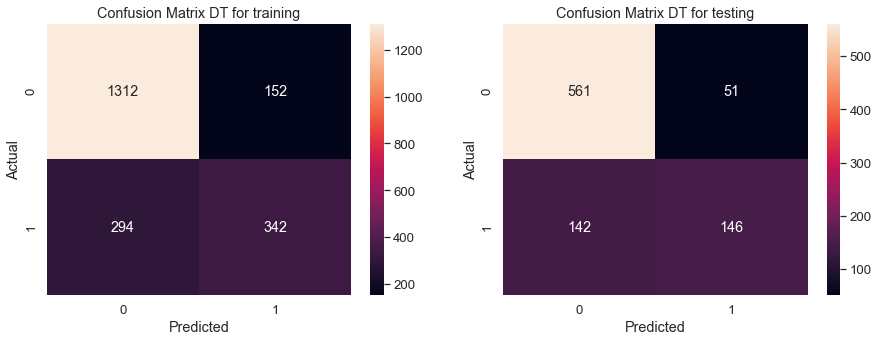

In [213]:
conf_mat_train_dt = confusion_matrix(train_labels, ytrain_pred_dt)
conf_mat_test_dt  = confusion_matrix(test_labels, ytest_pred_dt)

plt.figure(figsize=(15,5))
plt.subplot(1,2, 1)
sns.heatmap(conf_mat_train_dt, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.title('Confusion Matrix DT for training')
plt.ylabel('Actual')


plt.subplot(1,2, 2)
sns.heatmap(conf_mat_test_dt, annot= True, fmt='d')
plt.title('Confusion Matrix DT for testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Conf_mat_DT.png')

In [214]:
probs_train_dt = best_grid_dt.predict_proba(X_train)[:,1]
probs_test_dt = best_grid_dt.predict_proba(X_test)[:,1]

In [215]:
ytest_pred_dt
ytest_predict_prob=best_grid_dt.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.937500  0.062500
1  0.290323  0.709677
2  0.957447  0.042553
3  0.409357  0.590643
4  0.842857  0.157143

AUC Score for Training on Decision Tree :  0.8277625270646458


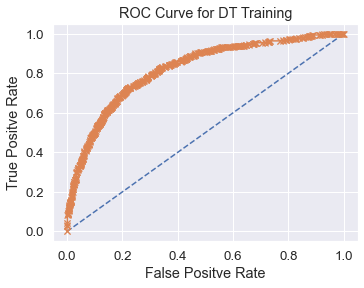

In [280]:
print('AUC Score for Training on Decision Tree : ', roc_auc_score(train_labels, probs_train_dt))
fpr_train_cart,tpr_train_cart, threshold_train_cart = roc_curve(train_labels, probs_train_dt)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr_train, tpr_train, marker='x')
plt.ylabel('True Positve Rate')
plt.xlabel('False Positve Rate')
plt.title('ROC Curve for DT Training')
cart_train_auc = roc_auc_score(train_labels, probs_train_dt)


AUC Score for Testing on Decision :  0.8161225717138707


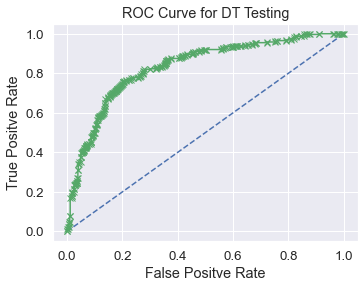

In [281]:
print('AUC Score for Testing on Decision : ', roc_auc_score(test_labels, probs_test_dt))
fpr_test_cart,tpr_test_cart, threshold_test_cart = roc_curve(test_labels, probs_test_dt)
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr_test, tpr_test, marker='x', color='g')
plt.ylabel('True Positve Rate')
plt.xlabel('False Positve Rate')
plt.title('ROC Curve for DT Testing')
plt.savefig('Roc_DT.png')
cart_test_auc = roc_auc_score(test_labels, probs_test_dt)


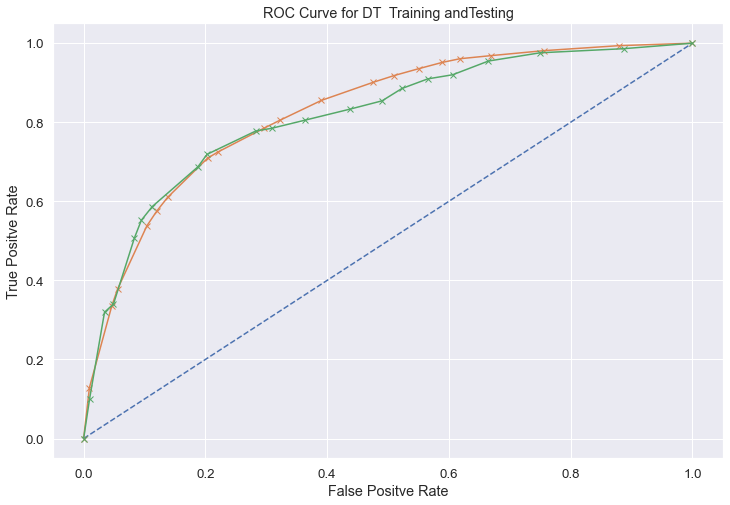

In [288]:
plt.figure(figsize=(12,8))
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr_train_cart, tpr_train_cart, marker='x')
plt.plot(fpr_test_cart, tpr_test_cart, marker='x', color='g')
plt.ylabel('True Positve Rate')
plt.xlabel('False Positve Rate')
plt.title('ROC Curve for DT  Training andTesting')
plt.savefig('Roc_DT_training and testing.png')

In [219]:
cart_train_acc=best_grid_dt.score(X_train,train_labels) 
cart_train_acc

0.7876190476190477

In [220]:
cart_test_acc=best_grid_dt.score(X_test,test_labels) 
cart_test_acc

0.7855555555555556

In [221]:
confusion_matrix(train_labels, ytrain_pred_dt)

array([[1312,  152],
       [ 294,  342]], dtype=int64)

In [222]:
cart_metrics=classification_report(train_labels, ytrain_pred_dt,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.54
cart_train_f1  0.61


In [223]:
cart_metrics=classification_report(test_labels, ytest_pred_dt,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.74
cart_test_recall  0.51
cart_test_f1  0.6


# Random Forest

In [224]:
print(grid_search_rf.best_params_)
best_grid_rf= grid_search_rf.best_estimator_
best_grid_rf

{'criterion': 'gini', 'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 35, 'min_samples_split': 200, 'n_estimators': 300}


RandomForestClassifier(max_depth=6, max_features=4, min_samples_leaf=35,
                       min_samples_split=200, n_estimators=300, random_state=0)

In [225]:
ytrain_pred_rf = best_grid_rf.predict(X_train)
ytest_pred_rf = best_grid_rf.predict(X_test)

print('\nTraining Accuracy_Score: ', accuracy_score(train_labels, ytrain_pred_rf))
print('\nFor training:\n',classification_report(train_labels, ytrain_pred_rf),'\n')
print('\nTesting Accuracy_Score: ', accuracy_score(test_labels, ytest_pred_rf))
print('\nFor testing:\n',classification_report(test_labels, ytest_pred_rf),'\n')



Training Accuracy_Score:  0.7766666666666666

For training:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1464
           1       0.68      0.49      0.57       636

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.71      2100
weighted avg       0.77      0.78      0.76      2100
 


Testing Accuracy_Score:  0.7811111111111111

For testing:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       612
           1       0.75      0.47      0.58       288

    accuracy                           0.78       900
   macro avg       0.77      0.70      0.72       900
weighted avg       0.78      0.78      0.76       900
 



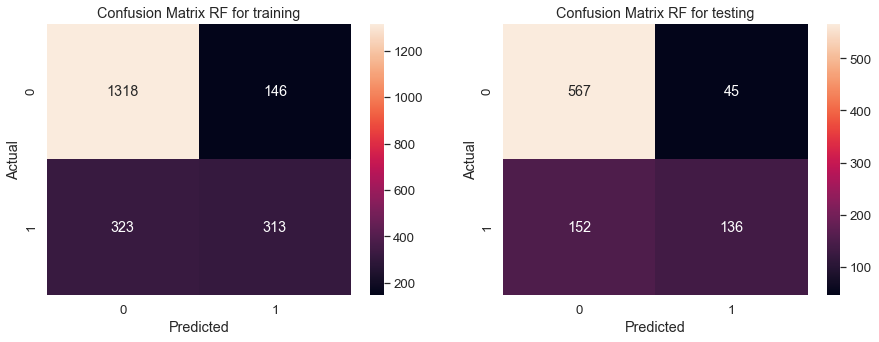

In [226]:
conf_mat_train_rf = confusion_matrix(train_labels, ytrain_pred_rf)
conf_mat_test_rf  = confusion_matrix(test_labels, ytest_pred_rf)

plt.figure(figsize=(15,5))
plt.subplot(1,2, 1)
sns.heatmap(conf_mat_train_rf, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.title('Confusion Matrix RF for training')
plt.ylabel('Actual')


plt.subplot(1,2, 2)
sns.heatmap(conf_mat_test_rf, annot= True, fmt='d')
plt.title('Confusion Matrix RF for testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Conf_mat_rf.png')

In [227]:
probs_train_rf= best_grid_rf.predict_proba(X_train)[:,1]
probs_test_rf = best_grid_rf.predict_proba(X_test)[:,1]

AUC Score for Training on RandomForest :  0.8211520947176686


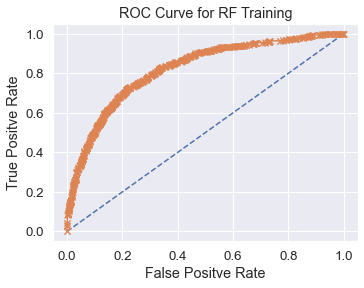

In [282]:
print('AUC Score for Training on RandomForest : ', roc_auc_score(train_labels, probs_train_rf))
fpr_train_rf,tpr_train_rf, threshold_train_rf = roc_curve(train_labels, probs_train_rf)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr_train, tpr_train, marker='x')
plt.ylabel('True Positve Rate')
plt.xlabel('False Positve Rate')
plt.title('ROC Curve for RF Training')
rf_train_auc=roc_auc_score(train_labels, probs_train_rf)

AUC Score for Testing on RandomForest :  0.8350240559186638


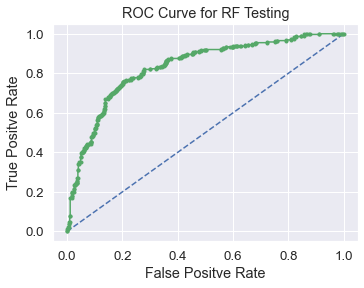

In [297]:
print('AUC Score for Testing on RandomForest : ', roc_auc_score(test_labels, probs_test_rf))
fpr_test_rf,tpr_test_rf, threshold_test_rf = roc_curve(test_labels, probs_test_rf)
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr_test, tpr_test, marker='.', color='g')
plt.ylabel('True Positve Rate')
plt.xlabel('False Positve Rate')
plt.title('ROC Curve for RF Testing')
plt.savefig('Roc_RF.png')
rf_test_auc=roc_auc_score(test_labels, probs_test_rf)

In [298]:
rf_test_auc=roc_auc_score(test_labels, probs_test_rf)
rf_test_auc

0.8350240559186638

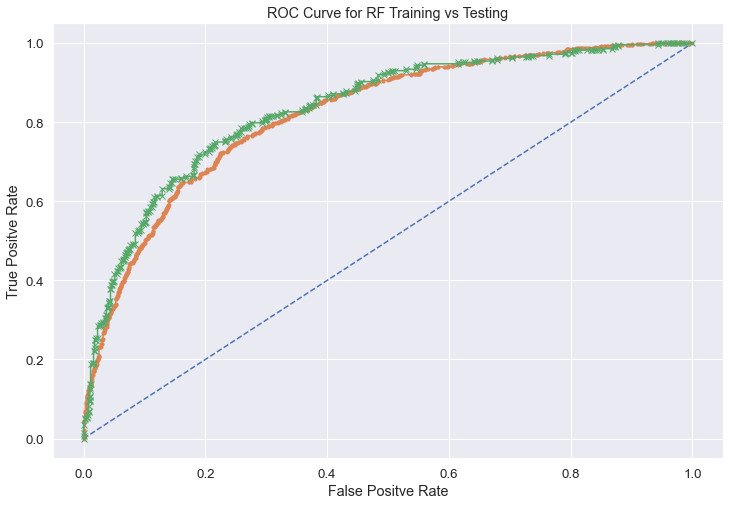

In [287]:
plt.figure(figsize=(12,8))
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr_train_rf, tpr_train_rf, marker='.')
plt.plot(fpr_test_rf, tpr_test_rf, marker='x', color='g')
plt.ylabel('True Positve Rate')
plt.xlabel('False Positve Rate')
plt.title('ROC Curve for RF Training vs Testing')
plt.savefig('Roc_RF_training and testing.png')

In [267]:
feature_importance_rf = pd.DataFrame(best_grid_rf.feature_importances_, 
                                columns=['Importance'], index=X_train.columns).sort_values('Importance', ascending=False)
feature_importance_rf

Importance
Agency_Code     0.353391
Product Name    0.275511
Sales           0.175424
Commision       0.097099
Duration        0.040506
1               0.040004
Age             0.011678
Destination     0.006388
Channel_1       0.000000

In [232]:
confusion_matrix(train_labels,ytrain_pred_rf)

array([[1318,  146],
       [ 323,  313]], dtype=int64)

In [233]:
rf_train_acc=best_grid_rf.score(X_train,train_labels) 
rf_train_acc

0.7766666666666666

In [234]:
rf_test_acc=best_grid_rf.score(X_test,test_labels) 
rf_test_acc

0.7811111111111111

In [235]:
rf_metrics=classification_report(train_labels, ytrain_pred_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.68
rf_train_recall  0.49
rf_train_f1  0.57


In [236]:
rf_metrics=classification_report(test_labels, ytest_pred_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.75
rf_test_recall  0.47
rf_test_f1  0.58


# ANN Model

In [237]:
print(grid_search_mlp.best_params_)
best_grid_mlp= grid_search_mlp.best_estimator_

ytrain_pred_mlp = best_grid_mlp.predict(X_trains)
ytest_pred_mlp = best_grid_mlp.predict(X_tests)


print('\nMLP Training Accuracy_Score: ', accuracy_score(train_labels, ytrain_pred_mlp))
print('MLP Testing Accuracy_Score: ', accuracy_score(test_labels, ytest_pred_mlp))

print('\nMLP For training :\n',classification_report(train_labels, ytrain_pred_mlp),'\n')
print('\nMLP For testing:\n',classification_report(test_labels, ytest_pred_mlp),'\n')

{'activation': 'relu', 'hidden_layer_sizes': 900, 'max_iter': 1000, 'solver': 'sgd', 'tol': 1e-05, 'verbose': True}

MLP Training Accuracy_Score:  0.7780952380952381
MLP Testing Accuracy_Score:  0.7733333333333333

MLP For training :
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1464
           1       0.68      0.50      0.58       636

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.71      2100
weighted avg       0.77      0.78      0.77      2100
 


MLP For testing:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       612
           1       0.71      0.50      0.58       288

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900
 



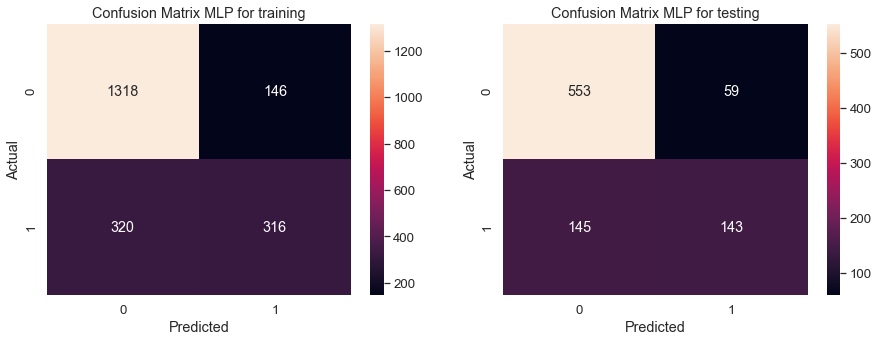

In [238]:
conf_mat_train_mlp = confusion_matrix(train_labels, ytrain_pred_mlp)
conf_mat_test_mlp  = confusion_matrix(test_labels, ytest_pred_mlp)

plt.figure(figsize=(15,5))
plt.subplot(1,2, 1)
sns.heatmap(conf_mat_train_mlp, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.title('Confusion Matrix MLP for training')
plt.ylabel('Actual')


plt.subplot(1,2, 2)
sns.heatmap(conf_mat_test_mlp, annot= True, fmt='d')
plt.title('Confusion Matrix MLP for testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Conf_mat_mlp.png')

In [239]:
probs_train_mlp= best_grid_mlp.predict_proba(X_trains)[:,1]
probs_test_mlp = best_grid_mlp.predict_proba(X_tests)[:,1]

AUC Score for Training on MLPClassifier :  0.8202553098257552


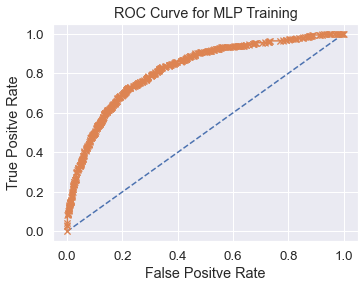

In [284]:
print('AUC Score for Training on MLPClassifier : ', roc_auc_score(train_labels, probs_train_mlp))
fpr_train_mlp,tpr_train_mlp, threshold_train_mlp = roc_curve(train_labels, probs_train_mlp)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr_train, tpr_train, marker='x')
plt.ylabel('True Positve Rate')
plt.xlabel('False Positve Rate')
plt.title('ROC Curve for MLP Training')
ann_train_auc=roc_auc_score(train_labels, probs_train_mlp)

AUC Score for Testing on MLP :  0.8325759123093681


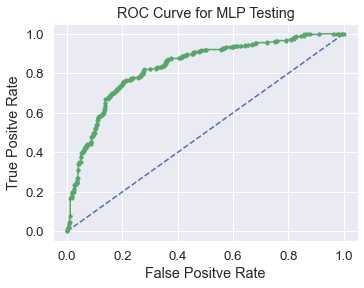

In [285]:
print('AUC Score for Testing on MLP : ', roc_auc_score(test_labels, probs_test_mlp))
fpr_test_mlp,tpr_test_mlp, threshold_test_mlp = roc_curve(test_labels, probs_test_mlp)
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr_test, tpr_test, marker='.', color='g')
plt.ylabel('True Positve Rate')
plt.xlabel('False Positve Rate')
plt.title('ROC Curve for MLP Testing')
plt.savefig('Roc_MLP.png')
ann_test_auc=roc_auc_score(test_labels, probs_test_mlp)

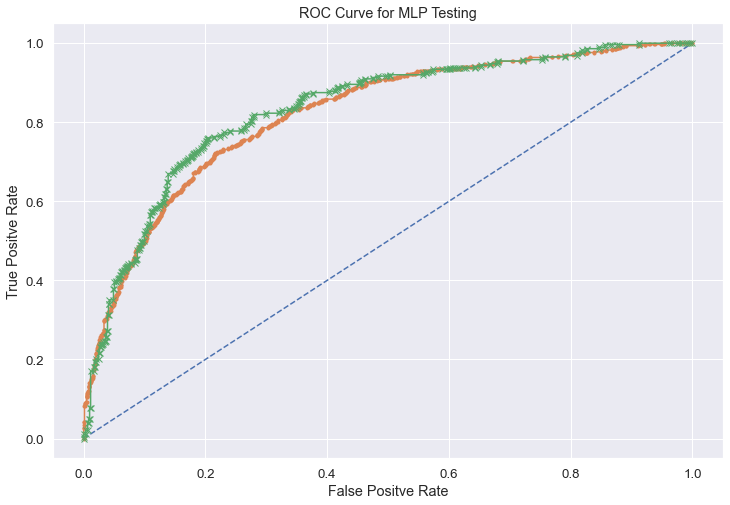

In [286]:
plt.figure(figsize=(12,8))
plt.plot([0,1], [0,1], linestyle= '--')
5
plt.plot(fpr_train_mlp, tpr_train_mlp, marker='.')
plt.plot(fpr_test_mlp, tpr_test_mlp, marker='x', color='g')
plt.ylabel('True Positve Rate')
plt.xlabel('False Positve Rate')
plt.title('ROC Curve for MLP Testing')
plt.savefig('Roc_MLP_training and testing.png')

In [243]:
confusion_matrix(train_labels,ytrain_pred_mlp)

array([[1318,  146],
       [ 320,  316]], dtype=int64)

In [272]:
ann_train_acc=accuracy_score(train_labels, ytrain_pred_mlp)
ann_train_acc

0.7780952380952381

In [273]:
ann_test_acc=accuracy_score(test_labels, ytest_pred_mlp)
ann_test_acc

0.7733333333333333

In [276]:
ann_metrics=classification_report(train_labels, ytrain_pred_mlp,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_train_precision=round(df.loc["1"][0],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_f1=round(df.loc["1"][2],2)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_precision  0.68
ann_train_recall  0.5
ann_train_f1  0.58


In [277]:
ann_metrics=classification_report(test_labels, ytest_pred_mlp,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
ann_test_precision=round(df.loc["1"][0],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_f1=round(df.loc["1"][2],2)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

ann_test_precision  0.71
ann_test_recall  0.5
ann_test_f1  0.58


## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.

In [300]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)

CART Train  CART Test  Random Forest Train  Random Forest Test  \
Accuracy         0.79       0.79                 0.78                0.78   
AUC              0.83       0.82                 0.82                0.84   
Recall           0.54       0.51                 0.49                0.47   
Precision        0.69       0.74                 0.68                0.75   
F1 Score         0.61       0.60                 0.57                0.58   

           Neural Network Train  Neural Network Test  
Accuracy                   0.78                 0.77  
AUC                        0.82                 0.83  
Recall                     0.50                 0.50  
Precision                  0.68                 0.71  
F1 Score                   0.58                 0.58

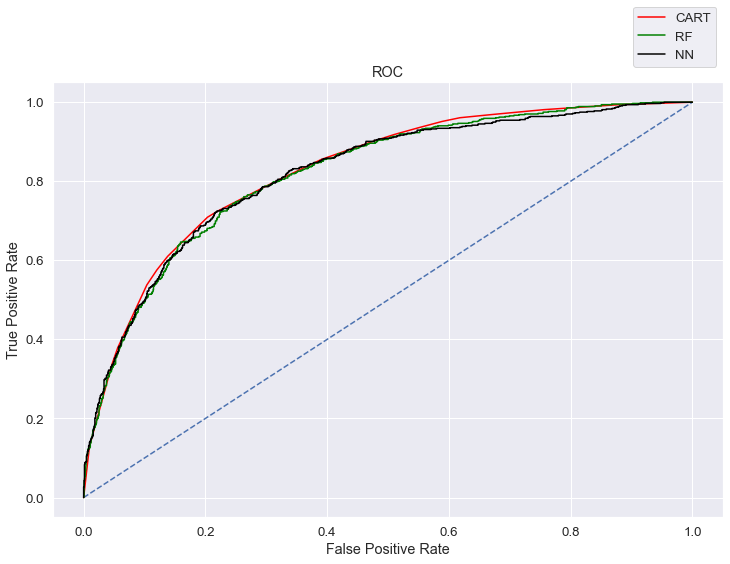

In [303]:
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_cart, tpr_train_cart,color='red',label="CART")
plt.plot(fpr_train_rf,tpr_train_rf,color='green',label="RF")
plt.plot(fpr_train_mlp,tpr_train_mlp,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.savefig('3 model plot for train data')

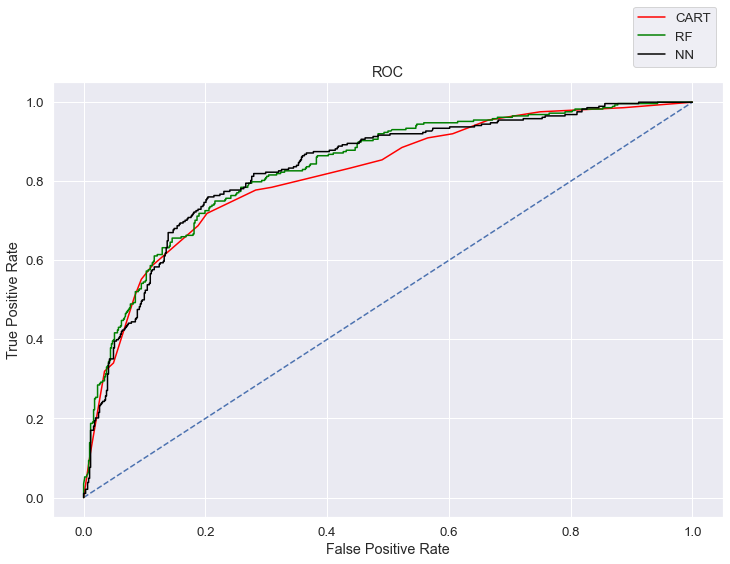

In [304]:
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test_cart, tpr_test_cart,color='red',label="CART")
plt.plot(fpr_test_rf,tpr_test_rf,color='green',label="RF")
plt.plot(fpr_test_mlp,tpr_test_mlp,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.savefig('3 model plot for test data')

AUC for Random Forest model for testing is highest among all other models i.e.,0.84%.
Random Forest is the best Model as it has highest AUC and precision is also very high, 2nd highest among all other models, and it gives 152 True positives that is also highest among all other models for testing. 


## 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

### Insights and Recommendations



This is understood by looking at the insurance data by drawing insights between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.

• Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits.

• As per the data 90% of insurance is done by online channel. 

• Other interesting fact, is almost all the offline business has a claimed associated, need to find why?

• Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency 

• Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. 

• Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?

Key performance indicators (KPI) The KPI’s of insurance claims are: 

• Reduce claims cycle time • Increase customer satisfaction 

• Combat fraud • Optimize claims recovery 

• Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.